In [39]:
# Technologies
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mpld3
import plotly.express as px
import requests
import folium
import seaborn as sns
import plotly.graph_objects as go

Mongo DB Data Extract and Load

In [40]:
client = MongoClient('mongodb://localhost:27017/')

In [41]:
# Create to the 'energy_data' database
db = client['energy_data']

# Create the new collections for all the energies
collection = db["energy_consumption"]


In [42]:
# Load the csv file using pandas
file_path = "Resources/World Energy Consumption.csv" 
df = pd.read_csv(file_path)

# Display the DataFrame to verify the data
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


Coal, Gas and Oil Energies

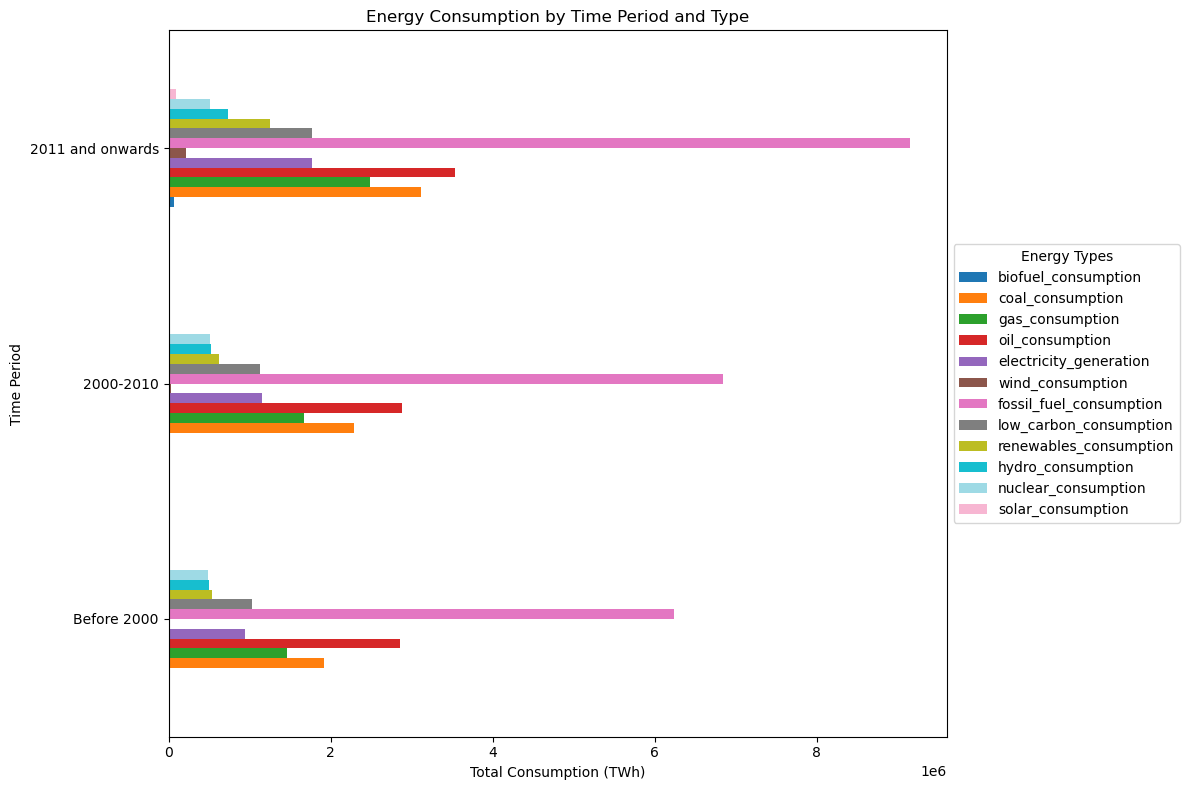

In [43]:
# Define the energy columns (excluding 'year') and filter the data
energy_columns_corrected = [
    'biofuel_consumption', 'coal_consumption', 'gas_consumption',
    'oil_consumption', 'electricity_generation', 'wind_consumption',
    'fossil_fuel_consumption', 'low_carbon_consumption', 
    'renewables_consumption', 'hydro_consumption', 'nuclear_consumption', 
    'solar_consumption'
]

# Filter the dataset to include only the relevant columns
df_energy_corrected = df[['year'] + energy_columns_corrected].dropna()

# Define the time periods and group by these periods
bins = [df_energy_corrected['year'].min(), 1999, 2010, df_energy_corrected['year'].max()]
labels = ['Before 2000', '2000-2010', '2011 and onwards']
df_energy_corrected['time_period'] = pd.cut(df_energy_corrected['year'], bins=bins, labels=labels)

# Group data by time period and sum the energy types (excluding 'year')
df_energy_grouped_period = df_energy_corrected.groupby('time_period', observed=True)[energy_columns_corrected].sum()

# Define a color palette with distinct colors
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
    '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#9edae5', '#f7b6d2'
]

# Plot the data with the custom color palette
ax = df_energy_grouped_period.plot(kind='barh', figsize=(12, 8), color=colors)


plt.title('Energy Consumption by Time Period and Type')
plt.xlabel('Total Consumption (TWh)')
plt.ylabel('Time Period')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Energy Types")
plt.tight_layout()
plt.show()


In [44]:
#Total rows  
df.count()

country                   22012
year                      22012
iso_code                  16512
population                18123
gdp                       11113
                          ...  
wind_elec_per_capita       7065
wind_electricity           7996
wind_energy_per_capita     4065
wind_share_elec            6886
wind_share_energy          4101
Length: 129, dtype: int64

In [45]:
# Inspect the columns 
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)

In [46]:
#Check for null values in the DataFrame
print("\nNull values per column:")
print(df.isnull().sum())


Null values per column:
country                       0
year                          0
iso_code                   5500
population                 3889
gdp                       10899
                          ...  
wind_elec_per_capita      14947
wind_electricity          14016
wind_energy_per_capita    17947
wind_share_elec           15126
wind_share_energy         17911
Length: 129, dtype: int64


In [47]:
# Remove rows with null values
df_cleaned = df.dropna()
print("\nDataFrame after removing rows with null values:")
df_cleaned.head(10)


DataFrame after removing rows with null values:


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160
1076,Argentina,2016,ARG,43668236.0,8.283729e+11,5.989,0.906,367.251,16.037,24.503,...,0.007,0.004,-7.749,-0.133,1.465,12.366,0.54,33.555,0.387,0.148
2966,Brazil,2013,BRA,201721776.0,3.112906e+12,16.904,24.974,856.203,172.715,194.674,...,0.000,0.000,30.215,4.075,17.922,32.619,6.58,88.845,1.168,0.516
2967,Brazil,2014,BRA,203459648.0,3.128573e+12,9.678,16.715,931.044,189.430,221.911,...,0.003,0.001,85.683,15.157,33.079,60.012,12.21,162.581,2.098,0.928
2968,Brazil,2015,BRA,205188208.0,3.270706e+12,16.967,32.141,1079.843,221.571,231.690,...,0.010,0.005,77.111,25.159,58.237,104.636,21.47,283.824,3.756,1.656
2969,Brazil,2016,BRA,206859584.0,2.889037e+12,-9.000,-19.942,974.715,201.629,237.552,...,0.014,0.007,54.857,31.414,89.651,160.689,33.24,433.390,5.817,2.612


In [48]:
#Total rows after removing nulls
df_cleaned.count()

country                   194
year                      194
iso_code                  194
population                194
gdp                       194
                         ... 
wind_elec_per_capita      194
wind_electricity          194
wind_energy_per_capita    194
wind_share_elec           194
wind_share_energy         194
Length: 129, dtype: int64

In [49]:
# Remove duplicate rows based on all columns 
df_no_duplicates = df_cleaned.drop_duplicates()  
print("\nDataFrame after removing duplicates:")
df_no_duplicates.head()


DataFrame after removing duplicates:


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160


In [50]:
# Check the shape of datafram
print("\nShape of the DataFrame after cleaning (rows, columns):", df_no_duplicates.shape)


Shape of the DataFrame after cleaning (rows, columns): (194, 129)


In [51]:
# Check data types
print("Data Types:")
print(df_cleaned.dtypes)

Data Types:
country                    object
year                        int64
iso_code                   object
population                float64
gdp                       float64
                           ...   
wind_elec_per_capita      float64
wind_electricity          float64
wind_energy_per_capita    float64
wind_share_elec           float64
wind_share_energy         float64
Length: 129, dtype: object


In [52]:
# Get summary statistics
print("Statistical Summary:")
print(df_cleaned.describe())

Statistical Summary:
              year    population           gdp  biofuel_cons_change_pct  \
count   194.000000  1.940000e+02  1.940000e+02               194.000000   
mean   2010.412371  8.307047e+07  2.895157e+12                49.849423   
std       4.853827  8.644717e+07  4.303275e+12               226.157606   
min    2000.000000  2.074923e+06  5.279414e+10               -91.427000   
25%    2007.000000  3.169251e+07  4.438345e+11                -1.284000   
50%    2011.000000  5.279418e+07  1.496484e+12                 8.374000   
75%    2014.000000  1.065257e+08  2.882627e+12                26.149250   
max    2018.000000  3.321400e+08  1.814065e+13              2666.627000   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count               194.000000               194.000000           194.000000   
mean                  2.932918               241.931165            34.794727   
std                   8.934901               295.799856        

In [53]:
# Define the required columns
columns_to_keep = [
    'country', 'year', 'iso_code', 'population', 'gdp', 'coal_cons_change_pct', 
    'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 
    'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 
    'coal_production', 'coal_share_elec', 'coal_share_energy', 'gas_cons_change_pct', 
    'gas_cons_change_twh', 'gas_consumption', 'gas_elec_per_capita', 'gas_electricity', 
    'gas_energy_per_capita', 'gas_prod_change_pct', 'gas_prod_change_twh', 'gas_prod_per_capita', 
    'gas_production', 'gas_share_elec', 'gas_share_energy', 'oil_cons_change_pct', 
    'oil_cons_change_twh', 'oil_consumption', 'oil_elec_per_capita', 'oil_electricity', 
    'oil_energy_per_capita', 'oil_prod_change_pct', 'oil_prod_change_twh', 'oil_prod_per_capita', 
    'oil_production', 'oil_share_elec', 'oil_share_energy'
]

# Filter the DataFrame to keep only the required columns
df_final = df_cleaned[columns_to_keep]

#  Round numeric columns to 2 decimal places
df_final = df_final.round(2)

# Display the shape and first few rows to verify
print(f"Shape of the DataFrame after column filtering (rows, columns): {df_final.shape}")
df_final.head()

Shape of the DataFrame after column filtering (rows, columns): (194, 41)


,country,year,iso_code,population,gdp,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,...,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,8.51,1.15,352.08,14.62,65.99,...,339.91,430.39,17.87,8186.56,-6.29,-24.34,8735.04,362.68,14.56,37.39
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,-6.50,-0.95,325.83,13.67,59.12,...,360.51,429.06,18.00,8593.35,-1.10,-4.01,8549.65,358.68,13.99,38.20
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,9.29,1.27,352.44,14.94,52.61,...,382.58,459.80,19.49,9025.61,-2.12,-7.62,8282.07,351.06,14.73,38.98
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,6.38,0.95,371.09,15.89,56.04,...,379.92,419.86,17.98,8871.54,-1.32,-4.65,8089.25,346.42,13.64,38.77
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,-0.49,-0.08,365.58,15.81,51.78,...,387.81,476.92,20.63,8965.24,0.87,3.02,8078.02,349.43,14.97,38.90


In [54]:
#new df columns name
df_final.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita',
       'coal_consumption', 'coal_elec_per_capita', 'coal_electricity',
       'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita',
       'coal_production', 'coal_share_elec', 'coal_share_energy',
       'gas_cons_change_pct', 'gas_cons_change_twh', 'gas_consumption',
       'gas_elec_per_capita', 'gas_electricity', 'gas_energy_per_capita',
       'gas_prod_change_pct', 'gas_prod_change_twh', 'gas_prod_per_capita',
       'gas_production', 'gas_share_elec', 'gas_share_energy',
       'oil_cons_change_pct', 'oil_cons_change_twh', 'oil_consumption',
       'oil_elec_per_capita', 'oil_electricity', 'oil_energy_per_capita',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'oil_prod_per_capita',
       'oil_production', 'oil_share_elec', 'oil_share_energy'],
      dtype='object')

In [55]:
# check DataFrame shape after removing columns
print("\nShape of the DataFrame after column removal (rows, columns):", df_final.shape)


Shape of the DataFrame after column removal (rows, columns): (194, 41)


In [56]:
# Iterate over the DataFrame rows and insert them into MongoDB
for index, row in df_final.iterrows():
    # Convert each row to a dictionary for MongoDB insertion
    collection.insert_one(row.to_dict())

print("Cleaned DataFrame inserted successfully into MongoDB!")


Cleaned DataFrame inserted successfully into MongoDB!


In [57]:
# Fetch the first 5 records from MongoDB and convert them to a DataFrame
records = list(collection.find()) 
df_mongo = pd.DataFrame(records)
#  Display the DataFrame containing the records
print("\nDataFrame containing the records from MongoDB:")
df_mongo.round(2)


DataFrame containing the records from MongoDB:


,_id,country,year,iso_code,population,gdp,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,...,nuclear_share_elec,nuclear_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy
0,6716ea7d0efb4be7d1a041cb,Argentina,2011,ARG,41520736.0,8.359705e+11,8.51,1.15,352.08,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6716ea7d0efb4be7d1a041cc,Argentina,2012,ARG,41952364.0,8.274048e+11,-6.50,-0.95,325.83,13.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6716ea7d0efb4be7d1a041cd,Argentina,2013,ARG,42388268.0,8.473051e+11,9.29,1.27,352.44,14.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6716ea7d0efb4be7d1a041ce,Argentina,2014,ARG,42824064.0,8.259815e+11,6.38,0.95,371.09,15.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6716ea7d0efb4be7d1a041cf,Argentina,2015,ARG,43257064.0,8.478550e+11,-0.49,-0.08,365.58,15.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23559,6716f756be164ae70c349270,United States,2014,USA,322033952.0,1.648266e+13,-0.23,-11.42,15560.02,5010.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23560,6716f756be164ae70c349271,United States,2015,USA,324607776.0,1.690258e+13,-13.61,-681.78,13336.33,4329.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23561,6716f756be164ae70c349272,United States,2016,USA,327210208.0,1.716256e+13,-8.51,-368.34,12104.58,3960.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23562,6716f756be164ae70c349273,United States,2017,USA,329791232.0,1.759628e+13,-2.73,-108.15,11681.91,3852.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# check DataFrame
df_describe=df_mongo.describe()
df_describe.round(2)

,year,population,gdp,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,...,nuclear_share_elec,nuclear_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy
count,23564.00,1.967500e+04,1.266500e+04,6034.00,6091.00,5442.00,6196.00,6626.00,7220.00,10433.00,...,6967.00,4030.00,2318.00,4771.00,4877.00,7225.00,8150.00,4204.00,7043.00,4229.00
mean,1976.60,1.035554e+08,6.693582e+11,20.90,25.81,6649.61,1754.86,887.87,317.90,17.07,...,6.46,4.71,119.02,4.55,21.18,20.31,6.95,75.78,0.63,0.22
std,35.08,4.460650e+08,2.837424e+12,746.50,219.89,8445.70,4988.34,1491.80,1072.07,600.72,...,13.66,7.19,507.36,28.30,139.18,78.90,50.89,247.41,2.05,0.65
min,1900.00,1.833000e+03,1.642060e+08,-100.00,-1472.54,0.00,0.00,0.00,0.00,-100.00,...,0.00,0.00,-100.00,-4.94,0.00,0.00,0.00,0.00,0.00,0.00
25%,1949.00,2.089906e+06,1.631173e+10,-4.86,-2.88,716.25,13.24,0.00,0.00,-4.46,...,0.00,0.00,9.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1987.00,8.146025e+06,5.906795e+10,0.90,0.12,3604.81,92.51,17.98,2.30,1.85,...,0.00,1.10,28.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2006.00,3.476229e+07,3.102019e+11,6.61,8.57,10306.16,713.25,1230.25,61.57,8.59,...,4.26,7.60,66.67,0.05,0.30,0.67,0.03,6.02,0.12,0.02
max,2022.00,7.975105e+09,1.136302e+14,55400.00,2649.77,96169.94,44858.12,9103.90,10190.71,44965.75,...,88.14,42.19,9900.00,676.41,3448.24,1279.35,1289.27,3868.36,40.00,7.59


In [59]:
# Check the unique countries and years in the DataFrame
print("Unique countries in the dataset:", df_mongo['country'].unique())
print("Unique years in the dataset:", df_mongo['year'].unique())

Unique countries in the dataset: ['Argentina' 'Brazil' 'Bulgaria' 'Canada' 'Czechia' 'France' 'Germany'
 'Hungary' 'Japan' 'Mexico' 'Romania' 'Russia' 'Slovakia' 'Slovenia'
 'South Africa' 'Spain' 'Ukraine' 'United Kingdom' 'United States'
 'ASEAN (Ember)' 'Afghanistan' 'Africa' 'Africa (EI)' 'Africa (Ember)'
 'Africa (Shift)' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antarctica' 'Antigua and Barbuda' 'Armenia' 'Aruba' 'Asia'
 'Asia & Oceania (EIA)' 'Asia (Ember)' 'Asia Pacific (EI)'
 'Asia and Oceania (Shift)' 'Australia' 'Australia and New Zealand (EIA)'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'British Virgin Islands' 'Brunei'
 'Burkina Faso' 'Burundi' 'CIS (EI)' 'Cambodia' 'Cameroon' 'Cape Verde'
 'Cayman Islands' 'Central & South America (EIA)'
 'Central African Republic' 'Central America (EI)'
 'Central and South America (Shift)' 'Chad' 'Chile' 

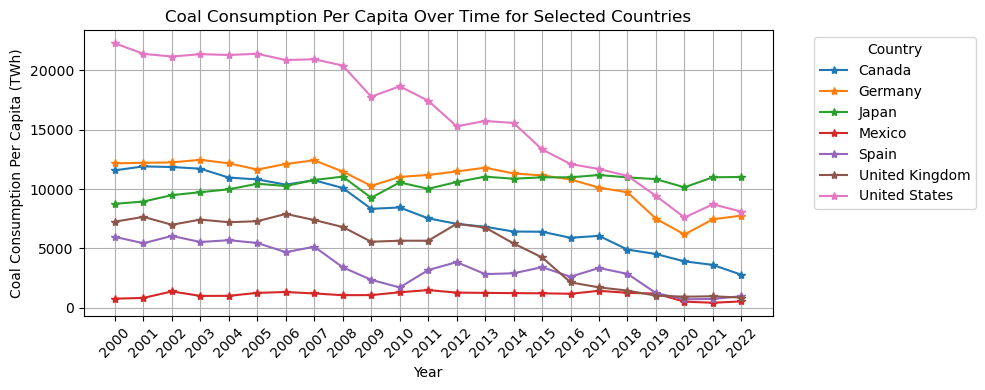

In [60]:
# Filter the data for the years from 2000 to 2024
filtered_df = df[(df['year'] >= 2000) & (df['year'] <= 2024)]

# Define the countries of interest
selected_countries = [
    'Canada', 'Germany', 'Japan', 'Mexico', 'Spain', 
    'United Kingdom', 'United States'
]

# Filter the DataFrame for the selected countries
top_countries_data = filtered_df[filtered_df['country'].isin(selected_countries)]

# Plotting Coal Consumption Per Capita for the selected countries
plt.figure(figsize=(10, 4))
for country in selected_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['coal_cons_per_capita'], 
             marker='*', label=country)

# Labels and title
plt.xlabel('Year')
plt.ylabel('Coal Consumption Per Capita (TWh)')
plt.title('Coal Consumption Per Capita Over Time for Selected Countries')
plt.xticks(country_data['year'].unique(), rotation=45)

# Legend and grid
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

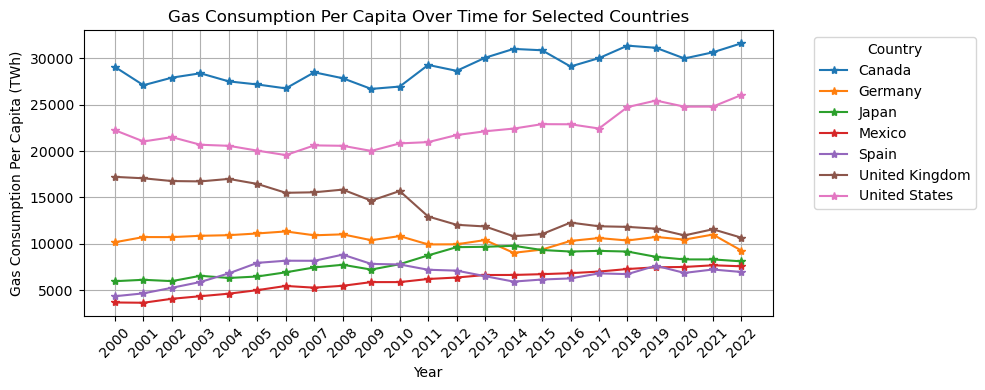

In [61]:
# Filter the data for the years from 2000 to 2024
filtered_df = df[(df['year'] >= 2000) & (df['year'] <= 2024)]

# Define the countries of interest
selected_countries = [
    'Canada', 'Germany', 'Japan', 'Mexico', 'Spain', 
    'United Kingdom', 'United States'
]

# Filter the DataFrame for the selected countries
top_countries_data = filtered_df[filtered_df['country'].isin(selected_countries)]

# Plotting Gas Consumption Per Capita for the selected countries
plt.figure(figsize=(10, 4))
for country in selected_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['gas_energy_per_capita'], 
             marker='*', label=country)

# Labels and title
plt.xlabel('Year')
plt.ylabel('Gas Consumption Per Capita (TWh)')
plt.title('Gas Consumption Per Capita Over Time for Selected Countries')
plt.xticks(country_data['year'].unique(), rotation=45)

# Legend and grid
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


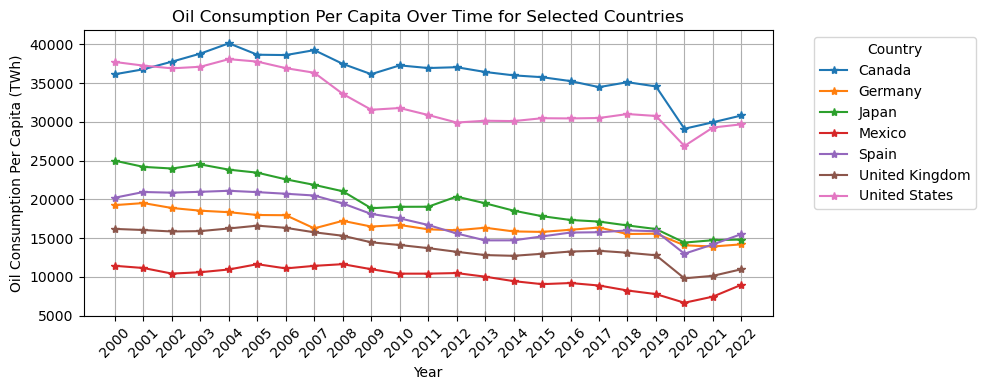

In [62]:
# Filter the data for the years from 2000 to 2024
filtered_df = df[(df['year'] >= 2000) & (df['year'] <= 2024)]

# Define the countries of interest
selected_countries = [
    'Canada', 'Germany', 'Japan', 'Mexico', 'Spain', 
    'United Kingdom', 'United States'
]

# Filter the DataFrame for the selected countries
top_countries_data = filtered_df[filtered_df['country'].isin(selected_countries)]

# Plotting Oil Consumption Per Capita for the selected countries
plt.figure(figsize=(10, 4))
for country in selected_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['oil_energy_per_capita'], 
             marker='*', label=country)

# Labels and title
plt.xlabel('Year')
plt.ylabel('Oil Consumption Per Capita (TWh)')
plt.title('Oil Consumption Per Capita Over Time for Selected Countries')
plt.xticks(country_data['year'].unique(), rotation=45)

# Legend and grid
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


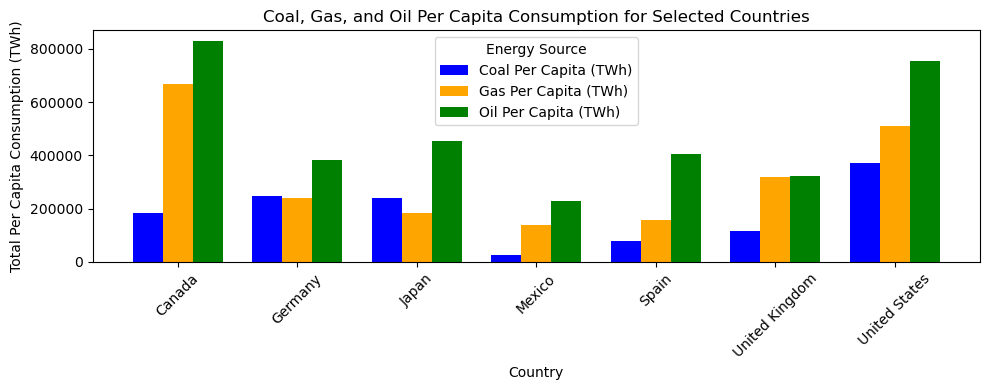

In [63]:
# Filter the data for the years from 2000 to 2024
filtered_df = df[(df['year'] >= 2000) & (df['year'] <= 2024)]

# Define the countries of interest
selected_countries = [
    'Canada', 'Germany', 'Japan', 'Mexico', 'Spain', 
    'United Kingdom', 'United States'
]

# Filter the DataFrame for the selected countries
top_countries_data = filtered_df[filtered_df['country'].isin(selected_countries)]

# Group by country and get the total per capita consumption for each resource
grouped_data = top_countries_data.groupby('country').agg({
    'coal_cons_per_capita': 'sum',
    'gas_energy_per_capita': 'sum',
    'oil_energy_per_capita': 'sum'
})

# Plotting
bar_width = 0.25
index = np.arange(len(grouped_data))

plt.figure(figsize=(10, 4))

# Create bars for each energy source per capita
plt.bar(index, grouped_data['coal_cons_per_capita'], bar_width, 
        label='Coal Per Capita (TWh)', color='blue')
plt.bar(index + bar_width, grouped_data['gas_energy_per_capita'], bar_width, 
        label='Gas Per Capita (TWh)', color='orange')
plt.bar(index + 2 * bar_width, grouped_data['oil_energy_per_capita'], bar_width, 
        label='Oil Per Capita (TWh)', color='green')

# Labels and titles
plt.xlabel('Country')
plt.ylabel('Total Per Capita Consumption (TWh)')
plt.title('Coal, Gas, and Oil Per Capita Consumption for Selected Countries')
plt.xticks(index + bar_width, grouped_data.index, rotation=45)

# Legend
plt.legend(title='Energy Source')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


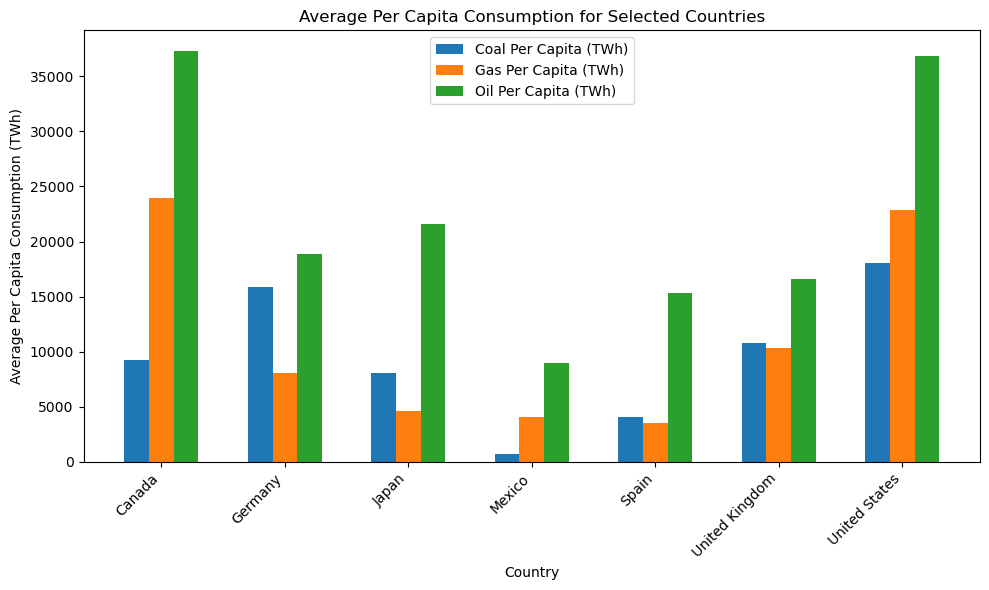

In [64]:
# Calculate the average per capita consumption per country
avg_per_capita_consumption = df.groupby('country').agg({
    'coal_cons_per_capita': 'mean',
    'gas_energy_per_capita': 'mean',
    'oil_energy_per_capita': 'mean'
}).reset_index()

# Use only the specified countries
selected_countries = [
    'Canada', 'Germany', 'Japan', 'Mexico', 
    'Spain', 'United Kingdom', 'United States'
]

top_countries_data = avg_per_capita_consumption[
    avg_per_capita_consumption['country'].isin(selected_countries)
]

# Set the bar width and position
bar_width = 0.2
x = range(len(top_countries_data))

# Plot the bars for coal, gas, and oil per capita consumption
plt.figure(figsize=(10, 6))
plt.bar(x, top_countries_data['coal_cons_per_capita'], 
        width=bar_width, label='Coal Per Capita (TWh)', color='tab:blue', align='center')
plt.bar([p + bar_width for p in x], top_countries_data['gas_energy_per_capita'], 
        width=bar_width, label='Gas Per Capita (TWh)', color='tab:orange', align='center')
plt.bar([p + 2 * bar_width for p in x], top_countries_data['oil_energy_per_capita'], 
        width=bar_width, label='Oil Per Capita (TWh)', color='tab:green', align='center')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Average Per Capita Consumption (TWh)')
plt.title('Average Per Capita Consumption for Selected Countries')

# Adjust the x-axis ticks to avoid overlap
plt.xticks([p + bar_width for p in x], top_countries_data['country'], rotation=45, ha='right')

# Add legend and adjust layout
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
# Filter the data for the years from 2000 to 2024
filtered_df = df[(df['year'] >= 2000) & (df['year'] <= 2024)]

# Define the countries of interest
selected_countries = [
    'Canada', 'Germany', 'Japan', 'Mexico', 
    'Spain', 'United Kingdom', 'United States'
]

# Filter the DataFrame for the selected countries
top_countries_data = filtered_df[filtered_df['country'].isin(selected_countries)]

# Group by country and sum the per capita consumption for each energy source
grouped_data = top_countries_data.groupby('country').agg({
    'coal_cons_per_capita': 'sum',
    'gas_energy_per_capita': 'sum',
    'oil_energy_per_capita': 'sum'
}).reset_index()

# Convert the data to long format for Plotly
long_format = grouped_data.melt(id_vars='country', 
                                value_vars=['coal_cons_per_capita', 'gas_energy_per_capita', 'oil_energy_per_capita'], 
                                var_name='Energy Source', 
                                value_name='Per Capita Consumption')

# Create the bubble plot using Plotly
fig = px.scatter(long_format, 
                 x='country', 
                 y='Per Capita Consumption', 
                 size='Per Capita Consumption', 
                 size_max=45, 
                 color='Energy Source',
                 labels={'Per Capita Consumption':'Consumption Per Capita (TWh)', 'country':'Country'},
                 title='Coal, Gas, and Oil Per Capita Consumption for Selected Countries',
                 hover_name='country', 
                 hover_data=['Per Capita Consumption', 'Energy Source'])

# Update axis labels
fig.update_layout(xaxis_title='Country', yaxis_title='Per Capita Consumption (TWh)')

# Show the plot
fig.show()


In [66]:
# Filter the data for the years from 2000 to 2024
filtered_df = df[(df['year'] >= 2000) & (df['year'] <= 2024)]

# Define the selected countries
selected_countries = [
    'Canada', 'Germany', 'Japan', 'Mexico', 
    'Spain', 'United Kingdom', 'United States'
]

# Filter the DataFrame for the selected countries
ct = filtered_df[filtered_df['country'].isin(selected_countries)]

# Create the animation bar chart for coal energy per capita
fig_coal = px.bar(
    ct, 
    x='country', 
    y='coal_cons_per_capita', 
    color='country',
    animation_frame="year", 
    animation_group="country", 
    range_y=[0, ct['coal_cons_per_capita'].max()], 
    title=('Coal Energy Per Capita for Selected Countries<br><sup>Comparing Coal Energy Per Capita Over Time</sup>'),
    labels={'coal_cons_per_capita': 'Per Capita Consumption (TWh)', 'country': 'Country'}
)

# Adding Play and Pause buttons
fig_coal.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Display the figure
fig_coal.show()


In [67]:
# Load and filter the data for the years from 2000 to 2024
filtered_df = df[(df['year'] >= 2000) & (df['year'] <= 2024)]

# Define the selected countries
selected_countries = [
    'Canada', 'Germany', 'Japan', 'Mexico', 
    'Spain', 'United Kingdom', 'United States'
]

# Filter the DataFrame for the selected countries
ct = filtered_df[filtered_df['country'].isin(selected_countries)]

# Create the animation bar chart for gas energy per capita
fig_gas = px.bar(
    ct, 
    x='country', 
    y='gas_energy_per_capita', 
    color='country',
    animation_frame="year", 
    animation_group="country", 
    range_y=[0, ct['gas_energy_per_capita'].max()], 
    title=('Gas Energy Per Capita for Selected Countries<br><sup>Comparing Gas Energy Per Capita Over Time</sup>'),
    labels={'gas_energy_per_capita': 'Per Capita Consumption (TWh)', 'country': 'Country'}
)

# Adding Play and Pause buttons
fig_gas.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Display the figure
fig_gas.show()


In [68]:
# Load and filter the data for the years from 2000 to 2024
filtered_df = df[(df['year'] >= 2000) & (df['year'] <= 2024)]

# Define the countries of interest
selected_countries = [
    'Canada', 'Germany', 'Japan', 'Mexico', 
    'Spain', 'United Kingdom', 'United States'
]

# Filter the DataFrame for the selected countries
ct = filtered_df[filtered_df['country'].isin(selected_countries)]

# Create the animation bar chart for oil energy per capita
fig_oil = px.bar(
    ct, 
    x='country', 
    y='oil_energy_per_capita', 
    color='country',
    animation_frame="year", 
    animation_group="country", 
    range_y=[0, ct['oil_energy_per_capita'].max()], 
    title=('Oil Energy Per Capita for Selected Countries<br><sup>Comparing Oil Energy Per Capita Over Time</sup>'),
    labels={'oil_energy_per_capita': 'Energy Per Capita (TWh)', 'country': 'Country'}
)

# Adding Play and Pause buttons
fig_oil.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Display the figure
fig_oil.show()


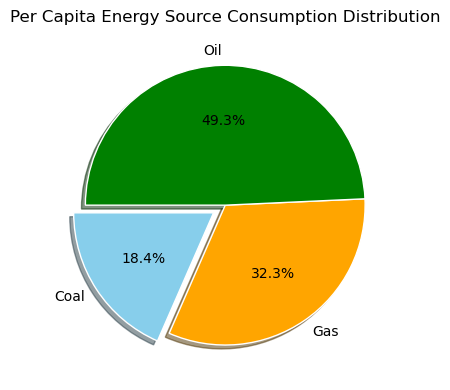

In [69]:
# Load and filter the data for the years from 2000 to 2024
filtered_df = df[(df['year'] >= 2000) & (df['year'] <= 2024)]

# Define the selected countries
selected_countries = [
    'Canada', 'Germany', 'Japan', 'Mexico', 
    'Spain', 'United Kingdom', 'United States'
]

# Filter the DataFrame for the selected countries
top_countries_data = filtered_df[filtered_df['country'].isin(selected_countries)]

# Group by country and sum the per capita consumption for each energy source
grouped_data = top_countries_data.groupby('country').agg({
    'coal_cons_per_capita': 'sum',
    'gas_energy_per_capita': 'sum',
    'oil_energy_per_capita': 'sum'
})

# Calculate total per capita consumption for each energy source across the selected countries
total_coal = grouped_data['coal_cons_per_capita'].sum()
total_gas = grouped_data['gas_energy_per_capita'].sum()
total_oil = grouped_data['oil_energy_per_capita'].sum()

# Data for the pie chart
labels = ['Coal', 'Gas', 'Oil']
sizes = [total_coal, total_gas, total_oil]
colors = ['skyblue', 'orange', 'green']

# Explode one of the slices for emphasis (exploding the coal slice)
explode = (0.1, 0, 0) 

# Create a pie chart with shadow effect and a balanced layout
fig, ax = plt.subplots(figsize=(10, 4))

# Create the pie chart
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=180, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Set aspect ratio to ensure the pie chart is circular
ax.set_aspect('equal', 'box')

# Title
plt.title("Per Capita Energy Source Consumption Distribution")

# Adjust layout for better proportions
plt.tight_layout()

# Display the pie chart
plt.show()


In [70]:
from config import geoapi_key

# List of countries for which we need coordinates
countries = ['Canada', 'Germany', 'Japan', 'Mexico', 'Spain', 'United Kingdom', 'United States']

# Function to get coordinates for a country
def get_coordinates(country):
    base_url = f"https://api.geoapify.com/v1/geocode/search?text={country}&apiKey={geoapi_key}"
    response = requests.get(base_url)
    if response.status_code == 200:
        data = response.json()
        if data['features']:
            lat = data['features'][0]['properties']['lat']
            lon = data['features'][0]['properties']['lon']
            return lat, lon
    return None, None

# Create a dictionary to store country coordinates
country_coords = {'Country': [], 'Latitude': [], 'Longitude': []}

# Fetch coordinates for each country
for country in countries:
    lat, lon = get_coordinates(country)
    country_coords['Country'].append(country)
    country_coords['Latitude'].append(lat)
    country_coords['Longitude'].append(lon)

# Convert coordinates to DataFrame
coords_df = pd.DataFrame(country_coords)

print(coords_df)

          Country   Latitude   Longitude
0          Canada  61.066692 -107.991707
1         Germany  51.163818   10.447831
2           Japan  36.574844  139.239418
3          Mexico  23.658512 -102.007710
4           Spain  39.326068   -4.837979
5  United Kingdom  54.702354   -3.276575
6   United States  39.783730 -100.445882


In [71]:
# Energy consumption data for 2022
energy_data_2022 = {
    'Country': countries,
    'Coal Consumption (TWh)': [2788.582, 7763.265, 11016.588, 547.351, 986.387, 869.846, 8103.174],
    'Gas Consumption (TWh)': [31629.277, 9270.737, 8107.861, 7575.104, 6959.187, 10662.307, 26049.031],
    'Oil Consumption (TWh)': [30822.062, 14191.266, 14811.619, 8971.466, 15516.564, 10976.965, 29683.652]
}

# Create a DataFrame for the 2022 energy data
energy_df_2022 = pd.DataFrame(energy_data_2022)

# Merge coordinates with energy data
final_df = pd.merge(coords_df, energy_df_2022, on='Country')

# Display the final DataFrame
print(final_df)



          Country   Latitude   Longitude  Coal Consumption (TWh)  \
0          Canada  61.066692 -107.991707                2788.582   
1         Germany  51.163818   10.447831                7763.265   
2           Japan  36.574844  139.239418               11016.588   
3          Mexico  23.658512 -102.007710                 547.351   
4           Spain  39.326068   -4.837979                 986.387   
5  United Kingdom  54.702354   -3.276575                 869.846   
6   United States  39.783730 -100.445882                8103.174   

   Gas Consumption (TWh)  Oil Consumption (TWh)  
0              31629.277              30822.062  
1               9270.737              14191.266  
2               8107.861              14811.619  
3               7575.104               8971.466  
4               6959.187              15516.564  
5              10662.307              10976.965  
6              26049.031              29683.652  


In [72]:
# Create a folium map centered at a central location
m = folium.Map(location=[20, 0], zoom_start=2)

# Add a topographic layer
folium.TileLayer('OpenTopoMap').add_to(m)

# Add energy consumption data as markers on the map
for i, row in final_df.iterrows():
    popup_text = f"""
    <strong>Country:</strong> {row['Country']}<br>
    <strong>Year:</strong> 2022<br>
    <strong>Coal Consumption:</strong> {row['Coal Consumption (TWh)']} TWh<br>
    <strong>Gas Consumption:</strong> {row['Gas Consumption (TWh)']} TWh<br>
    <strong>Oil Consumption:</strong> {row['Oil Consumption (TWh)']} TWh
    """
    
    # Add markers to the map
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Add layer control to toggle between layers
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save('energy_map_2022.html')

# Display the map
m


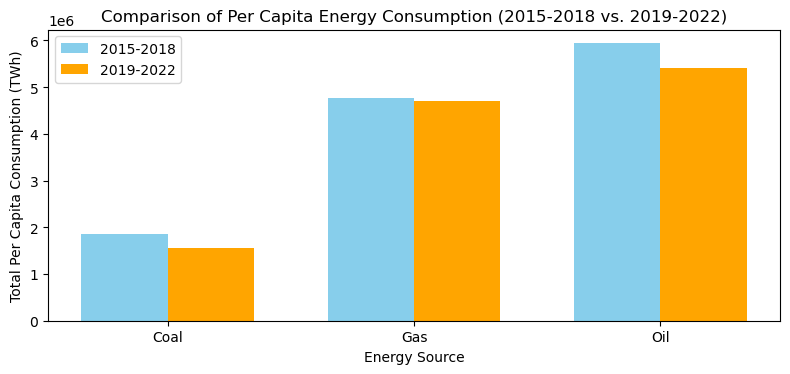

In [73]:
# Define the years of interest for the two periods
years_group_1 = [2015, 2016, 2017, 2018]
years_group_2 = [2019, 2020, 2021, 2022]

# Calculate total per capita consumption for each energy source for both periods
# Group 1 (2015, 2016, 2017, 2018)
coal_per_capita_group_1 = df[df['year'].isin(years_group_1)]['coal_cons_per_capita'].sum()
gas_per_capita_group_1 = df[df['year'].isin(years_group_1)]['gas_energy_per_capita'].sum()
oil_per_capita_group_1 = df[df['year'].isin(years_group_1)]['oil_energy_per_capita'].sum()

# Group 2 (2019, 2020, 2021, 2022)
coal_per_capita_group_2 = df[df['year'].isin(years_group_2)]['coal_cons_per_capita'].sum()
gas_per_capita_group_2 = df[df['year'].isin(years_group_2)]['gas_energy_per_capita'].sum()
oil_per_capita_group_2 = df[df['year'].isin(years_group_2)]['oil_energy_per_capita'].sum()

# Prepare the data for visualization
categories = ['Coal', 'Gas', 'Oil']
group_1_totals = [coal_per_capita_group_1, gas_per_capita_group_1, oil_per_capita_group_1]
group_2_totals = [coal_per_capita_group_2, gas_per_capita_group_2, oil_per_capita_group_2]

# Create a bar chart to visually compare the per capita consumption
bar_width = 0.35
index = range(len(categories))

plt.figure(figsize=(8, 4))

# Bars for 2015-2018
plt.bar(index, group_1_totals, bar_width, label='2015-2018', color='skyblue')

# Bars for 2019-2022
plt.bar([i + bar_width for i in index], group_2_totals, bar_width, label='2019-2022', color='orange')

# Add labels, title, and custom ticks
plt.xlabel('Energy Source')
plt.ylabel('Total Per Capita Consumption (TWh)')
plt.title('Comparison of Per Capita Energy Consumption (2015-2018 vs. 2019-2022)')
plt.xticks([i + bar_width / 2 for i in index], categories)

# Add a legend
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()


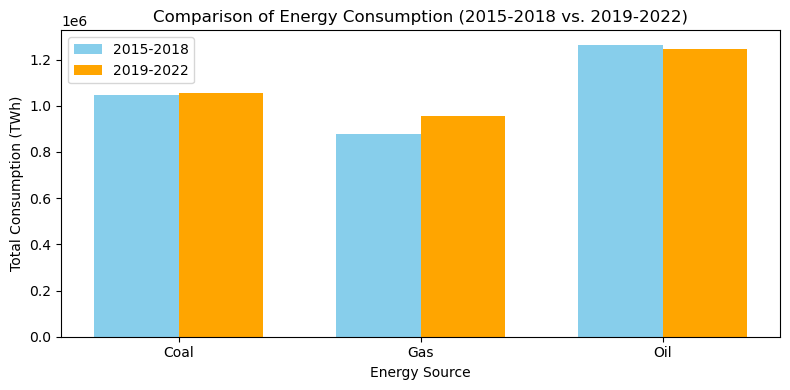

In [74]:
# Define the years of interest for the two periods
years_group_1 = [2015, 2016, 2017, 2018]
years_group_2 = [2019, 2020, 2021, 2022]

# Calculate total consumption for each energy source for both periods
# Group 1 (2015, 2016, 2017, 2018)
coal_consumption_group_1 = df[df['year'].isin(years_group_1)]['coal_consumption'].sum()
gas_consumption_group_1 = df[df['year'].isin(years_group_1)]['gas_consumption'].sum()
oil_consumption_group_1 = df[df['year'].isin(years_group_1)]['oil_consumption'].sum()

# Group 2 (2019, 2020, 2021, 2022)
coal_consumption_group_2 = df[df['year'].isin(years_group_2)]['coal_consumption'].sum()
gas_consumption_group_2 = df[df['year'].isin(years_group_2)]['gas_consumption'].sum()
oil_consumption_group_2 = df[df['year'].isin(years_group_2)]['oil_consumption'].sum()

# Prepare the data for visualization
categories = ['Coal', 'Gas', 'Oil']
group_1_totals = [coal_consumption_group_1, gas_consumption_group_1, oil_consumption_group_1]
group_2_totals = [coal_consumption_group_2, gas_consumption_group_2, oil_consumption_group_2]

# Create a bar chart to visually compare the total consumption
bar_width = 0.35
index = range(len(categories))

plt.figure(figsize=(8, 4))

# Bars for 2015-2018
plt.bar(index, group_1_totals, bar_width, label='2015-2018', color='skyblue')

# Bars for 2019-2022
plt.bar([i + bar_width for i in index], group_2_totals, bar_width, label='2019-2022', color='orange')

# Add labels, title, and custom ticks
plt.xlabel('Energy Source')
plt.ylabel('Total Consumption (TWh)')
plt.title('Comparison of Energy Consumption (2015-2018 vs. 2019-2022)')
plt.xticks([i + bar_width / 2 for i in index], categories)

# Add a legend
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()



Fossil, Low Carbon and Renewable Energies

In [75]:
# Check for null values in the DataFrame
print("Null values per column:")
print(df.isnull().sum())

Null values per column:
country                       0
year                          0
iso_code                   5500
population                 3889
gdp                       10899
                          ...  
wind_elec_per_capita      14947
wind_electricity          14016
wind_energy_per_capita    17947
wind_share_elec           15126
wind_share_energy         17911
Length: 129, dtype: int64


In [76]:
# Remove rows with null values
wec_cleaned_df = df.dropna()  # Removes any rows with null values
print("DataFrame after removing rows with null values:")
wec_cleaned_df.head(10)

DataFrame after removing rows with null values:


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160
1076,Argentina,2016,ARG,43668236.0,8.283729e+11,5.989,0.906,367.251,16.037,24.503,...,0.007,0.004,-7.749,-0.133,1.465,12.366,0.54,33.555,0.387,0.148
2966,Brazil,2013,BRA,201721776.0,3.112906e+12,16.904,24.974,856.203,172.715,194.674,...,0.000,0.000,30.215,4.075,17.922,32.619,6.58,88.845,1.168,0.516
2967,Brazil,2014,BRA,203459648.0,3.128573e+12,9.678,16.715,931.044,189.430,221.911,...,0.003,0.001,85.683,15.157,33.079,60.012,12.21,162.581,2.098,0.928
2968,Brazil,2015,BRA,205188208.0,3.270706e+12,16.967,32.141,1079.843,221.571,231.690,...,0.010,0.005,77.111,25.159,58.237,104.636,21.47,283.824,3.756,1.656
2969,Brazil,2016,BRA,206859584.0,2.889037e+12,-9.000,-19.942,974.715,201.629,237.552,...,0.014,0.007,54.857,31.414,89.651,160.689,33.24,433.390,5.817,2.612


In [77]:
#total rows after removing nulls
wec_cleaned_df.count()

country                   194
year                      194
iso_code                  194
population                194
gdp                       194
                         ... 
wind_elec_per_capita      194
wind_electricity          194
wind_energy_per_capita    194
wind_share_elec           194
wind_share_energy         194
Length: 129, dtype: int64

In [78]:
# Remove duplicate rows based on all columns 
wec_drop_dupes_df = wec_cleaned_df.drop_duplicates()  
print("DataFrame after removing duplicates:")
wec_drop_dupes_df.head()

DataFrame after removing duplicates:


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160


In [79]:
# Keep specific columns from the DataFrame
columns_to_remove = ['biofuel_cons_change_pct',
'biofuel_cons_change_twh',
'biofuel_cons_per_capita',
'biofuel_consumption',
'biofuel_elec_per_capita',
'biofuel_electricity',
'biofuel_share_elec',
'biofuel_share_energy',
'carbon_intensity_elec',
'coal_cons_change_pct',
'coal_cons_change_twh',
'coal_cons_per_capita',
'coal_consumption',
'coal_elec_per_capita',
'coal_electricity',
'coal_prod_change_pct',
'coal_prod_change_twh',
'coal_prod_per_capita',
'coal_production',
'coal_share_elec',
'coal_share_energy',
'electricity_demand',
'electricity_generation',
'electricity_share_energy',
'gas_cons_change_pct',
'gas_cons_change_twh',
'gas_consumption',
'gas_elec_per_capita',
'gas_electricity',
'gas_energy_per_capita',
'gas_prod_change_pct',
'gas_prod_change_twh',
'gas_prod_per_capita',
'gas_production',
'gas_share_elec',
'gas_share_energy',
'greenhouse_gas_emissions',
'hydro_cons_change_pct',
'hydro_cons_change_twh',
'hydro_consumption',
'hydro_elec_per_capita',
'hydro_electricity',
'hydro_energy_per_capita',
'hydro_share_elec',
'hydro_share_energy',
'net_elec_imports',
'net_elec_imports_share_demand',
'nuclear_cons_change_pct',
'nuclear_cons_change_twh',
'nuclear_consumption',
'nuclear_elec_per_capita',
'nuclear_electricity',
'nuclear_energy_per_capita',
'nuclear_share_elec',
'nuclear_share_energy',
'oil_cons_change_pct',
'oil_cons_change_twh',
'oil_consumption',
'oil_elec_per_capita',
'oil_electricity',
'oil_energy_per_capita',
'oil_prod_change_pct',
'oil_prod_change_twh',
'oil_prod_per_capita',
'oil_production',
'oil_share_elec',
'oil_share_energy',
'solar_cons_change_pct',
'solar_cons_change_twh',
'solar_consumption',
'solar_elec_per_capita',
'solar_electricity',
'solar_energy_per_capita',
'solar_share_elec',
'solar_share_energy',
'wind_cons_change_pct',
'wind_cons_change_twh',
'wind_consumption',
'wind_elec_per_capita',
'wind_electricity',
'wind_energy_per_capita',
'wind_share_elec',
'wind_share_energy']  # Replace with the actual column names you want to remove

wec_frc_df = wec_drop_dupes_df.drop(columns=columns_to_remove)

#  Round numeric columns to 2 decimal places
wec_frc_df = wec_frc_df.round(2)

print("DataFrame after removing specific columns:")
wec_frc_df.head()

DataFrame after removing specific columns:


,country,year,iso_code,population,gdp,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,...,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,2.84,25.12,21894.87,1.09,4.09,...,2956.35,909.09,1.45,-3.76,99.22,781.06,32.43,2389.66,26.42,10.91
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,3.81,34.62,22494.72,1.14,4.78,...,3067.53,943.71,0.28,-3.18,96.04,737.26,30.93,2289.24,24.04,10.18
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,3.99,37.69,23152.59,1.16,3.25,...,3121.38,981.40,12.75,11.33,107.37,826.41,35.03,2532.99,26.48,10.94
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,-0.16,-1.54,22881.01,1.19,-0.05,...,3077.94,979.86,3.76,0.80,108.17,802.59,34.37,2525.83,26.08,11.04
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,1.74,17.08,23046.87,1.18,1.49,...,3185.38,996.94,2.35,0.43,108.60,785.30,33.97,2510.58,24.65,10.89


In [80]:
wec_frc_df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita',
       'energy_per_gdp', 'fossil_cons_change_pct', 'fossil_cons_change_twh',
       'fossil_elec_per_capita', 'fossil_electricity',
       'fossil_energy_per_capita', 'fossil_fuel_consumption',
       'fossil_share_elec', 'fossil_share_energy',
       'low_carbon_cons_change_pct', 'low_carbon_cons_change_twh',
       'low_carbon_consumption', 'low_carbon_elec_per_capita',
       'low_carbon_electricity', 'low_carbon_energy_per_capita',
       'low_carbon_share_elec', 'low_carbon_share_energy',
       'other_renewable_consumption', 'other_renewable_electricity',
       'other_renewable_exc_biofuel_electricity',
       'other_renewables_cons_change_pct', 'other_renewables_cons_change_twh',
       'other_renewables_elec_per_capita',
       'other_renewables_elec_per_capita_exc_biofuel',
       'other_renewables_energy_per_capita', 'other_renewables_sha

In [81]:
# Iterate over the DataFrame rows and insert them into MongoDB
for index, row in wec_frc_df.iterrows():
    # Convert each row to a dictionary for MongoDB insertion
    collection.insert_one(row.to_dict())

print("Cleaned DataFrame inserted successfully into MongoDB!")

Cleaned DataFrame inserted successfully into MongoDB!


In [82]:
# Fetch the first 5 records from MongoDB and convert them to a DataFrame
records = list(collection.find()) 
wec_frc_mongo_df = pd.DataFrame(records)
#  Display the DataFrame containing the records
print("DataFrame containing the records from MongoDB:")
wec_frc_mongo_df.round(2)

DataFrame containing the records from MongoDB:


,_id,country,year,iso_code,population,gdp,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,...,nuclear_share_elec,nuclear_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy
0,6716ea7d0efb4be7d1a041cb,Argentina,2011,ARG,41520736.0,8.359705e+11,8.51,1.15,352.08,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6716ea7d0efb4be7d1a041cc,Argentina,2012,ARG,41952364.0,8.274048e+11,-6.50,-0.95,325.83,13.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6716ea7d0efb4be7d1a041cd,Argentina,2013,ARG,42388268.0,8.473051e+11,9.29,1.27,352.44,14.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6716ea7d0efb4be7d1a041ce,Argentina,2014,ARG,42824064.0,8.259815e+11,6.38,0.95,371.09,15.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6716ea7d0efb4be7d1a041cf,Argentina,2015,ARG,43257064.0,8.478550e+11,-0.49,-0.08,365.58,15.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23753,6716f76bbe164ae70c349332,United States,2014,USA,322033952.0,1.648266e+13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23754,6716f76bbe164ae70c349333,United States,2015,USA,324607776.0,1.690258e+13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23755,6716f76bbe164ae70c349334,United States,2016,USA,327210208.0,1.716256e+13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23756,6716f76bbe164ae70c349335,United States,2017,USA,329791232.0,1.759628e+13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


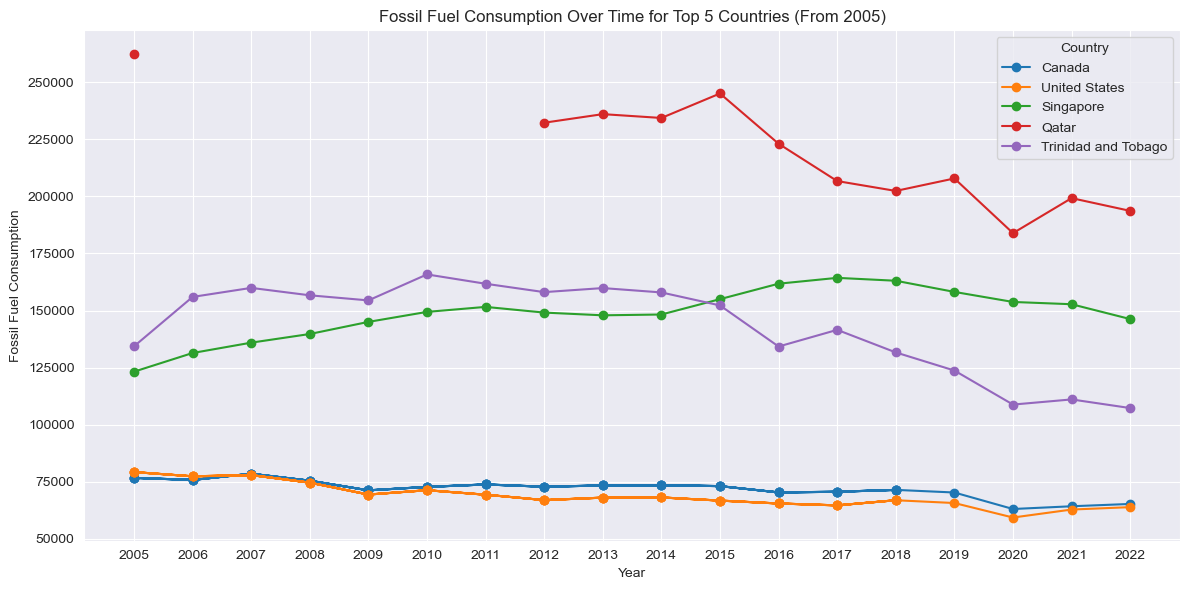

In [127]:
# Filter for the last 20 years (2005 to 2024)
filtered_df = wec_frc_mongo_df[(wec_frc_mongo_df['year'] >= 2005)]

# Get the top 5 countries by total biofuel consumption
top_countries = filtered_df.groupby('country')['fossil_energy_per_capita'].sum().nlargest(5).index

# Filter DataFrame for the top countries
top_countries_data = filtered_df[filtered_df['country'].isin(top_countries)]

# Plotting Biofuel Consumption
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['fossil_energy_per_capita'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Fossil Fuel Consumption')
plt.title('Fossil Fuel Consumption Over Time for Top 5 Countries (From 2005)')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

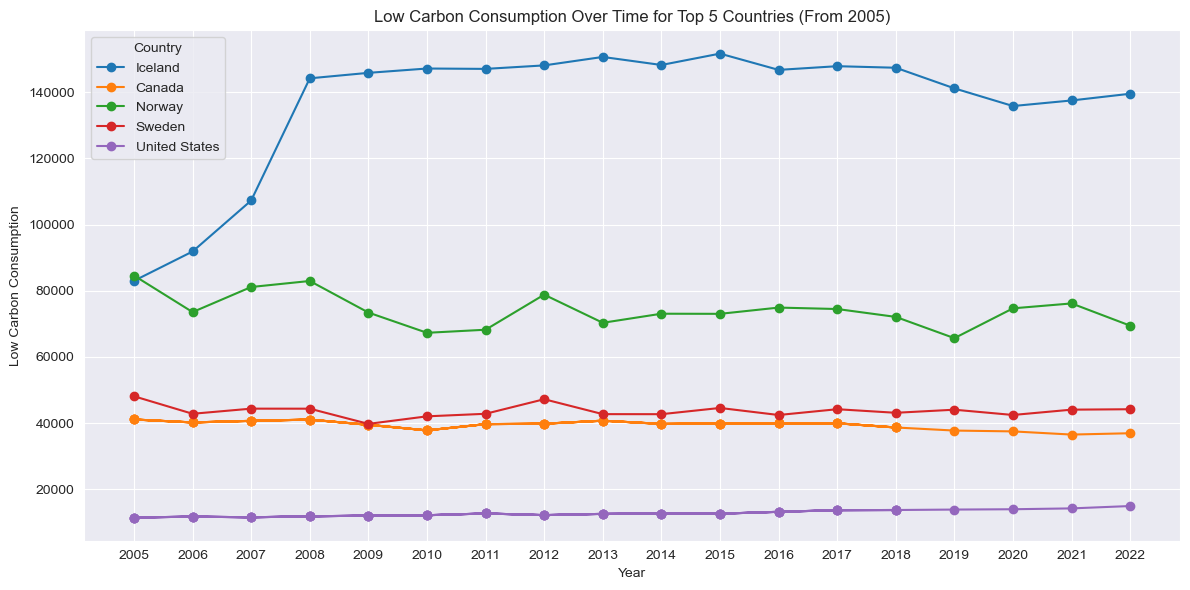

In [128]:
# Filter for the last 20 years (2005 to 2024)
filtered_df = wec_frc_mongo_df[(wec_frc_mongo_df['year'] >= 2005)]

# Get the top 5 countries by total biofuel consumption
top_countries = filtered_df.groupby('country')['low_carbon_energy_per_capita'].sum().nlargest(5).index

# Filter DataFrame for the top countries
top_countries_data = filtered_df[filtered_df['country'].isin(top_countries)]

# Plotting Biofuel Consumption
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['low_carbon_energy_per_capita'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Low Carbon Consumption')
plt.title('Low Carbon Consumption Over Time for Top 5 Countries (From 2005)')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


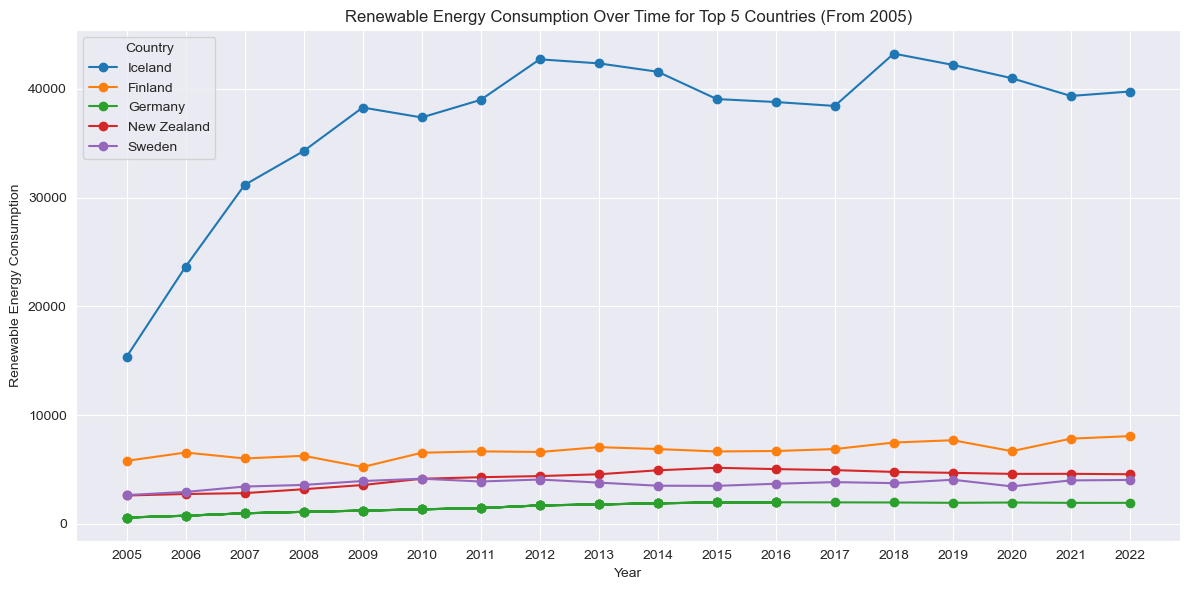

In [129]:
# Filter for the last 20 years (2005 to 2024)
filtered_df = wec_frc_mongo_df[(wec_frc_mongo_df['year'] >= 2005)]

# Get the top 5 countries by total biofuel consumption
top_countries = filtered_df.groupby('country')['other_renewables_energy_per_capita'].sum().nlargest(5).index

# Filter DataFrame for the top countries
top_countries_data = filtered_df[filtered_df['country'].isin(top_countries)]

# Plotting Biofuel Consumption
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['other_renewables_energy_per_capita'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Renewable Energy Consumption')
plt.title('Renewable Energy Consumption Over Time for Top 5 Countries (From 2005)')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

BioFuel, Wind and Electricity Energies

In [86]:
# check the shape of the cleaned DataFrame to verify the number of rows and columns
print("\nShape of the DataFrame after cleaning (rows, columns):", df_no_duplicates.shape)


Shape of the DataFrame after cleaning (rows, columns): (194, 129)


In [87]:
# Remove specific columns from the DataFrame
columns_to_remove = ['coal_cons_change_pct','coal_cons_change_twh','coal_cons_per_capita','coal_consumption','coal_elec_per_capita','coal_electricity','coal_prod_change_pct','coal_prod_change_twh','coal_prod_per_capita','coal_production','coal_share_elec','coal_share_energy','fossil_cons_change_pct','fossil_cons_change_twh','fossil_elec_per_capita','fossil_electricity','fossil_energy_per_capita','fossil_fuel_consumption','fossil_share_elec','fossil_share_energy','gas_cons_change_pct','gas_cons_change_twh','gas_consumption','gas_elec_per_capita','gas_electricity','gas_energy_per_capita','gas_prod_change_pct','gas_prod_change_twh','gas_prod_per_capita','gas_production','gas_share_elec','gas_share_energy','greenhouse_gas_emissions','hydro_cons_change_pct','hydro_cons_change_twh','hydro_consumption','hydro_elec_per_capita','hydro_electricity','hydro_energy_per_capita','hydro_share_elec','hydro_share_energy','low_carbon_cons_change_pct','low_carbon_cons_change_twh','low_carbon_consumption','low_carbon_elec_per_capita','low_carbon_electricity','low_carbon_energy_per_capita','low_carbon_share_elec','low_carbon_share_energy','net_elec_imports','net_elec_imports_share_demand','nuclear_cons_change_pct','nuclear_cons_change_twh','nuclear_consumption','nuclear_elec_per_capita','nuclear_electricity','nuclear_energy_per_capita','nuclear_share_elec','nuclear_share_energy','oil_cons_change_pct','oil_cons_change_twh','oil_consumption','oil_elec_per_capita','oil_electricity','oil_energy_per_capita','oil_prod_change_pct','oil_prod_change_twh','oil_prod_per_capita','oil_production','oil_share_elec','oil_share_energy','other_renewable_consumption','other_renewable_electricity','other_renewable_exc_biofuel_electricity','other_renewables_cons_change_pct','other_renewables_cons_change_twh','other_renewables_elec_per_capita','other_renewables_elec_per_capita_exc_biofuel','other_renewables_energy_per_capita','other_renewables_share_elec','other_renewables_share_elec_exc_biofuel','other_renewables_share_energy','per_capita_electricity','primary_energy_consumption','renewables_cons_change_pct','renewables_cons_change_twh','renewables_consumption','renewables_elec_per_capita','renewables_electricity','renewables_energy_per_capita','renewables_share_elec','renewables_share_energy','solar_cons_change_pct','solar_cons_change_twh','solar_consumption','solar_elec_per_capita','solar_electricity','solar_energy_per_capita','solar_share_elec','solar_share_energy']  # Replace with the actual column names you want to remove
df_final = df_no_duplicates.drop(columns=columns_to_remove)
#  Round numeric columns to 2 decimal places
df_final = df_final.round(2)

print("\nDataFrame after removing specific columns:")
df_final.head()


DataFrame after removing specific columns:


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,energy_per_capita,energy_per_gdp,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.42,2.75,208.89,8.67,32.27,...,21894.87,1.09,4.89,0.00,0.07,1.44,0.06,1.77,0.05,0.01
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.88,1.72,247.83,10.40,33.13,...,22494.72,1.14,1290.95,0.94,1.01,19.55,0.82,24.17,0.64,0.11
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.48,1.50,280.80,11.90,35.39,...,23152.59,1.16,22.57,0.22,1.24,23.83,1.01,29.15,0.76,0.13
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.71,1.99,324.38,13.89,32.69,...,22881.01,1.19,36.65,0.44,1.68,14.48,0.62,39.19,0.47,0.17
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.93,1.24,349.79,15.13,33.06,...,23046.87,1.18,-4.22,-0.08,1.60,13.64,0.59,36.94,0.43,0.16


In [88]:
df_final.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita', 'biofuel_electricity', 'biofuel_share_elec',
       'biofuel_share_energy', 'carbon_intensity_elec', 'electricity_demand',
       'electricity_generation', 'electricity_share_energy',
       'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita',
       'energy_per_gdp', 'wind_cons_change_pct', 'wind_cons_change_twh',
       'wind_consumption', 'wind_elec_per_capita', 'wind_electricity',
       'wind_energy_per_capita', 'wind_share_elec', 'wind_share_energy'],
      dtype='object')

In [89]:
# check DataFrame shape after removing columns
print("\nShape of the DataFrame after column removal (rows, columns):", df_final.shape)


Shape of the DataFrame after column removal (rows, columns): (194, 29)


In [90]:
# Iterate over the DataFrame rows and insert them into MongoDB
for index, row in df_final.iterrows():
    # Convert each row to a dictionary for MongoDB insertion
    collection.insert_one(row.to_dict())

print("Cleaned DataFrame inserted successfully into MongoDB!")

Cleaned DataFrame inserted successfully into MongoDB!


In [91]:
# Fetch the first 5 records from MongoDB and convert them to a DataFrame
records = list(collection.find()) 
df_mongo = pd.DataFrame(records)
#  Display the DataFrame containing the records
print("\nDataFrame containing the records from MongoDB:")
df_mongo.round(2)


DataFrame containing the records from MongoDB:


,_id,country,year,iso_code,population,gdp,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,...,nuclear_share_elec,nuclear_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy
0,6716ea7d0efb4be7d1a041cb,Argentina,2011,ARG,41520736.0,8.359705e+11,8.51,1.15,352.08,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6716ea7d0efb4be7d1a041cc,Argentina,2012,ARG,41952364.0,8.274048e+11,-6.50,-0.95,325.83,13.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6716ea7d0efb4be7d1a041cd,Argentina,2013,ARG,42388268.0,8.473051e+11,9.29,1.27,352.44,14.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6716ea7d0efb4be7d1a041ce,Argentina,2014,ARG,42824064.0,8.259815e+11,6.38,0.95,371.09,15.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6716ea7d0efb4be7d1a041cf,Argentina,2015,ARG,43257064.0,8.478550e+11,-0.49,-0.08,365.58,15.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23947,6716f774be164ae70c3493f4,United States,2014,USA,322033952.0,1.648266e+13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23948,6716f774be164ae70c3493f5,United States,2015,USA,324607776.0,1.690258e+13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23949,6716f774be164ae70c3493f6,United States,2016,USA,327210208.0,1.716256e+13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23950,6716f774be164ae70c3493f7,United States,2017,USA,329791232.0,1.759628e+13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df_describe=df_mongo.describe()
df_describe.round(2)

,year,population,gdp,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,...,nuclear_share_elec,nuclear_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy
count,23952.00,2.006300e+04,1.305300e+04,6034.00,6091.00,5442.00,6196.00,6626.00,7220.00,10433.00,...,6967.00,4030.00,2318.00,4771.00,4877.00,7225.00,8150.00,4204.00,7043.00,4229.00
mean,1977.15,1.031592e+08,7.355200e+11,20.90,25.81,6649.61,1754.86,887.87,317.90,17.07,...,6.46,4.71,119.02,4.55,21.18,20.31,6.95,75.78,0.63,0.22
std,35.06,4.419022e+08,2.915852e+12,746.50,219.89,8445.70,4988.34,1491.80,1072.07,600.72,...,13.66,7.19,507.36,28.30,139.18,78.90,50.89,247.41,2.05,0.65
min,1900.00,1.833000e+03,1.642060e+08,-100.00,-1472.54,0.00,0.00,0.00,0.00,-100.00,...,0.00,0.00,-100.00,-4.94,0.00,0.00,0.00,0.00,0.00,0.00
25%,1950.00,2.157858e+06,1.702320e+10,-4.86,-2.88,716.25,13.24,0.00,0.00,-4.46,...,0.00,0.00,9.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1988.00,8.440035e+06,6.465469e+10,0.90,0.12,3604.81,92.51,17.98,2.30,1.85,...,0.00,1.10,28.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2007.00,3.703526e+07,3.452738e+11,6.61,8.57,10306.16,713.25,1230.25,61.57,8.59,...,4.26,7.60,66.67,0.05,0.30,0.67,0.03,6.02,0.12,0.02
max,2022.00,7.975105e+09,1.136302e+14,55400.00,2649.77,96169.94,44858.12,9103.90,10190.71,44965.75,...,88.14,42.19,9900.00,676.41,3448.24,1279.35,1289.27,3868.36,40.00,7.59


In [93]:
# Check the unique countries and years in the DataFrame
print("Unique countries in the dataset:", df_mongo['country'].unique())
print("Unique years in the dataset:", df_mongo['year'].unique())

Unique countries in the dataset: ['Argentina' 'Brazil' 'Bulgaria' 'Canada' 'Czechia' 'France' 'Germany'
 'Hungary' 'Japan' 'Mexico' 'Romania' 'Russia' 'Slovakia' 'Slovenia'
 'South Africa' 'Spain' 'Ukraine' 'United Kingdom' 'United States'
 'ASEAN (Ember)' 'Afghanistan' 'Africa' 'Africa (EI)' 'Africa (Ember)'
 'Africa (Shift)' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antarctica' 'Antigua and Barbuda' 'Armenia' 'Aruba' 'Asia'
 'Asia & Oceania (EIA)' 'Asia (Ember)' 'Asia Pacific (EI)'
 'Asia and Oceania (Shift)' 'Australia' 'Australia and New Zealand (EIA)'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'British Virgin Islands' 'Brunei'
 'Burkina Faso' 'Burundi' 'CIS (EI)' 'Cambodia' 'Cameroon' 'Cape Verde'
 'Cayman Islands' 'Central & South America (EIA)'
 'Central African Republic' 'Central America (EI)'
 'Central and South America (Shift)' 'Chad' 'Chile' 

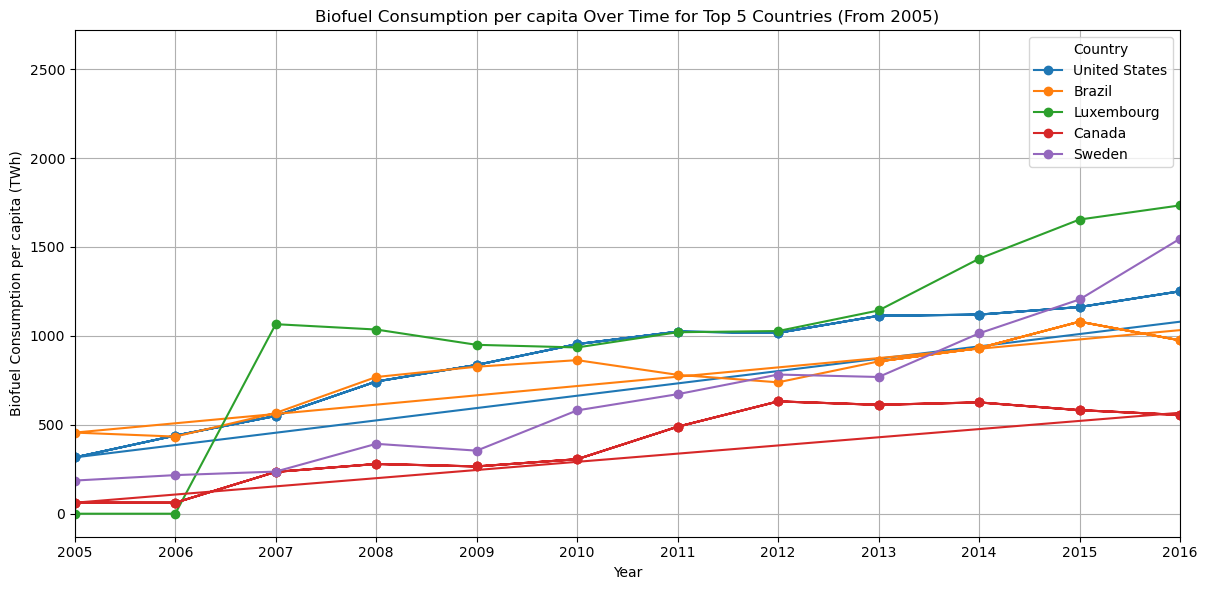

In [94]:
# Filter for the last 10 decades (2010 to 2020)
filtered_df = df_mongo[(df_mongo['year'] >= 2005) & (df_mongo['year'] <= 2024)]

# Get the top 5 countries by total biofuel consumption
top_countries = filtered_df.groupby('country')['biofuel_cons_per_capita'].sum().nlargest(5).index

# Filter DataFrame for the top countries
top_countries_data = filtered_df[filtered_df['country'].isin(top_countries)]

# Plotting Biofuel Consumption
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['biofuel_cons_per_capita'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Biofuel Consumption per capita (TWh)')
plt.title('Biofuel Consumption per capita Over Time for Top 5 Countries (From 2005)')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()

# Set the x-axis limits to match your data range
plt.xlim(2005, 2016)
# Save the plot as an HTML file for viewing in the browser
html_filename = 'biofuel_cons_per_capita_plot.html'
mpld3.save_html(plt.gcf(), html_filename)

plt.show()

In [95]:
# Calculate average consumption per country
avg_consumption = df.groupby('country').agg({
    'biofuel_consumption': 'mean',
    'wind_consumption': 'mean'
}).reset_index()

# Filter for the specific countries
selected_countries = ['Canada', 'Germany', 'Japan', 'Spain', 'United Kingdom']
filtered_countries = avg_consumption[avg_consumption['country'].isin(selected_countries)]

# Create a Plotly figure
fig = go.Figure()

# Add traces for biofuel and wind consumption
fig.add_trace(go.Bar(
    x=filtered_countries['country'],  
    y=filtered_countries['biofuel_consumption'],
    name='Biofuel',
    marker_color='green'
))

fig.add_trace(go.Bar(
    x=filtered_countries['country'],  
    y=filtered_countries['wind_consumption'],
    name='Wind',
    marker_color='blue'
))

# Update layout
fig.update_layout(
    title='Average Biofuel and Wind Consumption for Selected Countries',
    xaxis_title='Country',
    yaxis_title='Average Consumption (TWh)',
    barmode='group'  
)

# Save the figure as an HTML file
html_filename = 'biofuel_wind_consumption_plot.html'
fig.write_html(html_filename)

# Show the figure
fig.show()

In [96]:

# Filter the data for the years from 1990 to 2024
filtered_df = df_mongo[(df_mongo['year'] >= 1990) & (df_mongo['year'] <= 2024)]

# Get the top 7 countries based on electricity demand
top_countries_oil = filtered_df.groupby('country')['electricity_demand'].sum().nlargest(7).index

# Filter data for the top 7 countries based on electricity demand
top_countries_data = filtered_df[filtered_df['country'].isin(top_countries_oil)]

# Group by country and get the total consumption for each resource
grouped_data = top_countries_data.groupby('country').agg({
    'electricity_demand': 'sum',
    'electricity_generation': 'sum',
    'electricity_share_energy': 'sum'
}).reset_index()

# Create the bar plot with Plotly
fig = go.Figure()

# Add bars for each energy source
fig.add_trace(go.Bar(x=grouped_data['country'], 
                     y=grouped_data['electricity_demand'], 
                     name='Electricity Demand', 
                     marker_color='blue'))

fig.add_trace(go.Bar(x=grouped_data['country'], 
                     y=grouped_data['electricity_generation'], 
                     name='Electricity Generation', 
                     marker_color='orange'))

fig.add_trace(go.Bar(x=grouped_data['country'], 
                     y=grouped_data['electricity_share_energy'], 
                     name='Electricity Share', 
                     marker_color='green'))

# Update layout
fig.update_layout(title='Comparison of Electricity Demand, Generation, and Share of Total Energy by Country',
                  xaxis_title='Country',
                  yaxis_title='Electricity (TWh)',
                  barmode='group')

# Save the plot as an HTML file
html_filename = 'electricity_comparison_plot_plotly.html'
fig.write_html(html_filename)


# Display the plot in the Jupyter notebook
fig.show()



In [97]:
# Filter the DataFrame for the years 2005 to 2024
filtered_df = df_mongo[(df_mongo['year'] >= 2005) & (df_mongo['year'] <= 2024)]

# Specify the selected countries
selected_countries = ['Canada', 'Germany', 'Japan', 'Mexico', 'Spain', 'United Kingdom', 'United States']

# Filter the DataFrame for the selected countries
filtered_df = filtered_df[filtered_df['country'].isin(selected_countries)]

# Group by country and calculate the average carbon intensity of electricity for each country
avg_carbon_intensity = filtered_df.groupby('country')['carbon_intensity_elec'].mean().reset_index()

# Sort by carbon intensity and select the top N countries (e.g., top 4)
top_countries = avg_carbon_intensity.sort_values('carbon_intensity_elec', ascending=False).head(4)['country'].tolist()

# Filter the original DataFrame for the top N countries
df_filtered = filtered_df[filtered_df['country'].isin(top_countries)]

# Check if there are any entries in the filtered DataFrame
if df_filtered.empty:
    print("No data available for the top countries and year range.")
else:
    # Create the bar chart with the filtered data
    fig = px.bar(df_filtered, 
                 x='country', 
                 y='carbon_intensity_elec', 
                 color='country', 
                 animation_frame="year", 
                 animation_group="country", 
                 range_y=[0, df_filtered['carbon_intensity_elec'].max()], 
                 title='Carbon Intensity of Electricity Over the Years',
                 width=800,  
                 height=400)

    # Add play/pause buttons with reduced speed
    fig.update_layout(
        updatemenus=[
            {
                'type': 'buttons',
                'showactive': False,
                'buttons': [
                    {
                        'label': 'Play',
                        'method': 'animate',
                        'args': [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}]  # Slower animation (1000ms per frame)
                    },
                    {
                        'label': 'Pause',
                        'method': 'animate',
                        'args': [[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "fromcurrent": True}]  # Pauses the animation
                    }
                ]
            }
        ]
    )
    
    # Save the plot as an HTML file
    html_filename = 'Carbon_Intensity_of_Electricity_Over_the_Years_plotly.html'
    fig.write_html(html_filename)

    # Show the visual
    fig.show()


In [102]:
# Filter for the last two decades (2005 to 2024)
filtered_df = df_mongo[(df_mongo['year'] >= 2005) & (df_mongo['year'] <= 2024)].copy()  # Create a copy

# Group by country and calculate the average biofuel share of electricity for each country
avg_biofuel_share = filtered_df.groupby('country')['biofuel_share_elec'].mean().reset_index()

# Sort by biofuel share of electricity and select the top N countries (e.g., top 5)
top_countries = avg_biofuel_share.sort_values('biofuel_share_elec', ascending=False).head(5)['country'].tolist()

# Filter the original DataFrame for the top N countries
df_filtered = filtered_df[filtered_df['country'].isin(top_countries)]

# Check for NaN values in the 'gdp' column
print(df_filtered['gdp'].isna().sum())

# Handle NaN values in 'gdp' (fill or drop)
df_filtered.loc[:, 'gdp'] = df_filtered['gdp'].fillna(value=0)  # Use .loc to avoid SettingWithCopyWarning

# Create a scatter plot for biofuel share of electricity
fig = px.scatter(df_filtered, 
                 x='year', 
                 y='biofuel_share_elec', 
                 color='country', 
                 size='gdp', 
                 hover_name='country', 
                 title='Biofuel Share of Electricity Over Time (Top 5 Countries)',
                 labels={'biofuel_share_elec': 'Biofuel Share in Electricity (%)', 'year': 'Year'})

# Save the plot as an HTML file
html_filename = 'Biofuel Share of Electricity Over Time (Top 5 Countries)_plotly.html'
fig.write_html(html_filename)

# Show the visual
fig.show()

31


In [103]:
# Your GeoAPI API key
from config import api_key 

# Sample country names
countries = ['Australia', 'Canada', 'Germany', 'United States', 'India','saudi Arabia','Russia','united kingdom']

# Function to get latitude and longitude for a country
def get_coordinates(country_name, api_key):
    url = f"https://api.geoapify.com/v1/geocode/search?text={country_name}&apiKey={api_key}"
    response = requests.get(url).json()
    if response['features']:
        lat = response['features'][0]['properties']['lat']
        lon = response['features'][0]['properties']['lon']
        return lat, lon
    return None, None

# Create a DataFrame to store country and their coordinates
country_coordinates = []

for country in countries:
    lat, lon = get_coordinates(country, api_key)
    country_coordinates.append({'country': country, 'lat': lat, 'lon': lon})

df_coords = pd.DataFrame(country_coordinates)
df_coords

,country,lat,lon
0,Australia,-24.776109,134.755000
1,Canada,61.066692,-107.991707
2,Germany,51.163818,10.447831
3,United States,39.783730,-100.445882
4,India,22.351115,78.667743
5,saudi Arabia,25.624262,42.352833
6,Russia,64.686314,97.745306
7,united kingdom,54.702354,-3.276575


In [104]:
# Create a DataFrame to store country and their coordinates
country_coordinates = []

# Get coordinates for each country and combine with the energy data
for country in countries:
    lat, lon = get_coordinates(country, api_key)
    if lat is not None and lon is not None:
        # Find the relevant row in the original DataFrame
        country_data = df_mongo[df_mongo['country'] == country]
        
        # Check if any data was found for the country
        if not country_data.empty:
            country_data = country_data.iloc[0]
            country_coordinates.append({
                'country': country,
                'lat': lat,
                'lon': lon,
                'population': country_data['population'],
                'gdp': country_data['gdp'],
                'biofuel_consumption': country_data['biofuel_consumption'],
                'wind_consumption': country_data['wind_consumption'],
                'electricity_generation': country_data['electricity_generation']
            })
        else:
            print(f"No data found for {country}")

# Convert to DataFrame
df_map_data = pd.DataFrame(country_coordinates)

# Create a basic Folium map centered globally with OpenTopoMap tiles for topography
m = folium.Map(location=[20, 0], zoom_start=2, tiles='OpenTopoMap')

# Add markers for each country with relevant information in the popup
for _, row in df_map_data.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=(f"Country: {row['country']}<br>"
               f"Population: {row['population']:,}<br>"
               f"GDP: ${row['gdp']:,}<br>"
               f"Biofuel Consumption: {row['biofuel_consumption']} TWh<br>"
               f"Wind Consumption: {row['wind_consumption']} TWh<br>"
               f"Electricity Generation: {row['electricity_generation']} TWh")
    ).add_to(m)

# Save the map to an HTML file
m.save('country_map_with_energy_data_topography.html')

# Display the map in a notebook 
m

No data found for saudi Arabia
No data found for united kingdom


Hydro, Nuclear and Solar Energies

In [105]:
# Insert the data into MongoDB
collection.insert_many(df.to_dict('records'))

print("Data inserted into MongoDB.")

Data inserted into MongoDB.


In [106]:
# List of countries to filter
countries = ['Asia', 'Austria', 'Australia','Brazil', 'Canada', 'China', 'Croatia', 'Algeria', 'Argentina','Europe',
              'France', 'Germany', 'India', 'Italy', 'Japan', 'Netherlands', 'North America', 'Russia',
              'South Africa', 'South America', 'South Korea', 'Spain', 'Turkey', 'Ukraine', 
              'United Arab Emirates','United Kingdom', 'United States', 'Vietnam']

# Query MongoDB to find documents where 'country' is in the list
results = collection.find({'country': {'$in': countries}})

# Convert the results to a list
results_list = list(results)

# Check the number of documents found
print(f"Found {len(results_list)} documents for the specified countries.")

Found 7838 documents for the specified countries.


In [107]:
# Storing in a separate MongoDB collection

for country in countries:
    # Filter results for each country
    country_data = [doc for doc in results_list if doc.get('country') == country]
    
    # Remove the '_id' field from each document to avoid duplicate key errors
    for doc in country_data:
        if '_id' in doc:
            del doc['_id']
    
    # Create a new collection for each country
    country_collection = db[f'{country}_data']
    
    # Insert the data into the new collection
    if country_data:
        country_collection.insert_many(country_data)
        print(f"Inserted {len(country_data)} documents for {country}.")
    else:
        print(f"No data found for {country}.")


Inserted 246 documents for Asia.
Inserted 246 documents for Austria.
Inserted 246 documents for Australia.
Inserted 306 documents for Brazil.
Inserted 436 documents for Canada.
Inserted 246 documents for China.
Inserted 66 documents for Croatia.
Inserted 246 documents for Algeria.
Inserted 306 documents for Argentina.
Inserted 246 documents for Europe.
Inserted 306 documents for France.
Inserted 406 documents for Germany.
Inserted 246 documents for India.
Inserted 246 documents for Italy.
Inserted 336 documents for Japan.
Inserted 246 documents for Netherlands.
Inserted 246 documents for North America.
Inserted 96 documents for Russia.
Inserted 376 documents for South Africa.
Inserted 246 documents for South America.
Inserted 246 documents for South Korea.
Inserted 406 documents for Spain.
Inserted 246 documents for Turkey.
Inserted 266 documents for Ukraine.
Inserted 246 documents for United Arab Emirates.
Inserted 406 documents for United Kingdom.
Inserted 436 documents for United St

In [108]:
# Convert the results to a pandas DataFrame
df_filtered = pd.DataFrame(results_list)

# Save the DataFrame to a CSV file
df_filtered.to_csv('Resources/filtered_countries_data.csv', index=False)

print("Data exported to 'filtered_countries_data.csv'.")

Data exported to 'filtered_countries_data.csv'.


In [109]:
# Reading the .csv file

filtered_df = pd.read_csv('Resources/filtered_countries_data.csv')
filtered_df.head()

,country,year,iso_code,population,gdp,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,...,nuclear_share_elec,nuclear_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy
0,Argentina,2011,ARG,41520736.0,8.359705e+11,8.51,1.15,352.08,14.62,65.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,2012,ARG,41952364.0,8.274048e+11,-6.50,-0.95,325.83,13.67,59.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,2013,ARG,42388268.0,8.473051e+11,9.29,1.27,352.44,14.94,52.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,2014,ARG,42824064.0,8.259815e+11,6.38,0.95,371.09,15.89,56.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,2015,ARG,43257064.0,8.478550e+11,-0.49,-0.08,365.58,15.81,51.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# Dropping null values from the dataframe

filtered_df = df.dropna()
filtered_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160


In [111]:
# Removing any duplicate values

final_df = filtered_df.drop_duplicates()
final_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160


In [112]:
# Retaining only required columns related to hydro, nuclear and solar

columns_to_drop=['biofuel_cons_change_pct','biofuel_cons_change_twh','biofuel_cons_per_capita','biofuel_consumption','biofuel_elec_per_capita','biofuel_electricity','biofuel_share_elec','biofuel_share_energy',
                 'carbon_intensity_elec','coal_cons_change_pct','coal_cons_change_twh','coal_cons_per_capita','coal_consumption','coal_elec_per_capita','coal_electricity','coal_prod_change_pct',
                 'coal_prod_change_twh','coal_prod_per_capita','coal_production','coal_share_elec','coal_share_energy','electricity_demand','electricity_generation','electricity_share_energy',
                 'energy_cons_change_pct','energy_cons_change_twh','energy_per_capita','energy_per_gdp','fossil_cons_change_pct','fossil_cons_change_twh','fossil_elec_per_capita','fossil_electricity',
                 'fossil_energy_per_capita','fossil_fuel_consumption','fossil_share_elec','fossil_share_energy','gas_cons_change_pct','gas_cons_change_twh','gas_consumption','gas_elec_per_capita',
                 'gas_electricity','gas_energy_per_capita','gas_prod_change_pct','gas_prod_change_twh','gas_prod_per_capita','gas_production','gas_share_elec','gas_share_energy','greenhouse_gas_emissions',
                 'low_carbon_cons_change_pct','low_carbon_cons_change_twh','low_carbon_consumption','low_carbon_elec_per_capita','low_carbon_electricity','low_carbon_energy_per_capita','low_carbon_share_elec',
                 'low_carbon_share_energy','net_elec_imports','net_elec_imports_share_demand','oil_cons_change_pct','oil_cons_change_twh','oil_consumption','oil_elec_per_capita','oil_electricity',
                 'oil_energy_per_capita','oil_prod_change_pct','oil_prod_change_twh','oil_prod_per_capita','oil_production','oil_share_elec','oil_share_energy','other_renewable_consumption',
                 'other_renewable_electricity','other_renewable_exc_biofuel_electricity','other_renewables_cons_change_pct','other_renewables_cons_change_twh','other_renewables_elec_per_capita',
                 'other_renewables_elec_per_capita_exc_biofuel','other_renewables_energy_per_capita','other_renewables_share_elec','other_renewables_share_elec_exc_biofuel','other_renewables_share_energy',
                 'per_capita_electricity','primary_energy_consumption','renewables_cons_change_pct','renewables_cons_change_twh','renewables_consumption','renewables_elec_per_capita','renewables_electricity',
                 'renewables_energy_per_capita','renewables_share_elec','renewables_share_energy','wind_cons_change_pct','wind_cons_change_twh','wind_consumption','wind_elec_per_capita','wind_electricity',
                 'wind_energy_per_capita','wind_share_elec','wind_share_energy']

new_df = final_df.drop(columns= columns_to_drop)
new_df.head()

,country,year,iso_code,population,gdp,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,...,nuclear_share_elec,nuclear_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,-6.514,-6.559,86.034,747.337,31.03,...,4.798,1.864,1779.148,0.004,0.004,0.000,0.00,0.107,0.000,0.000
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,-6.485,-6.067,79.967,684.348,28.71,...,4.585,1.785,406.380,0.018,0.022,0.238,0.01,0.534,0.008,0.002
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,12.368,9.349,89.316,766.957,32.51,...,4.331,1.654,84.438,0.019,0.041,0.236,0.01,0.969,0.008,0.004
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,-1.082,-1.496,87.820,754.949,32.33,...,3.991,1.463,5.771,0.002,0.043,0.467,0.02,1.009,0.015,0.004
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,-0.244,-0.736,87.084,738.377,31.94,...,4.819,1.825,-7.909,-0.004,0.040,0.231,0.01,0.914,0.007,0.004


In [113]:
# Checking the columns in the new dataframe before plotting

new_df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'hydro_cons_change_pct', 'hydro_cons_change_twh', 'hydro_consumption',
       'hydro_elec_per_capita', 'hydro_electricity', 'hydro_energy_per_capita',
       'hydro_share_elec', 'hydro_share_energy', 'nuclear_cons_change_pct',
       'nuclear_cons_change_twh', 'nuclear_consumption',
       'nuclear_elec_per_capita', 'nuclear_electricity',
       'nuclear_energy_per_capita', 'nuclear_share_elec',
       'nuclear_share_energy', 'solar_cons_change_pct',
       'solar_cons_change_twh', 'solar_consumption', 'solar_elec_per_capita',
       'solar_electricity', 'solar_energy_per_capita', 'solar_share_elec',
       'solar_share_energy'],
      dtype='object')

In [114]:
# Iterate over the DataFrame rows and insert them into MongoDB
for index, row in new_df.iterrows():
    # Convert each row to a dictionary for MongoDB insertion
    collection.insert_one(row.to_dict())

print("Cleaned DataFrame inserted successfully into MongoDB!")

Cleaned DataFrame inserted successfully into MongoDB!


In [115]:
# checking the countries in the dataframe

print("Unique countries in the dataset:", new_df['country'].unique())

Unique countries in the dataset: ['Argentina' 'Brazil' 'Bulgaria' 'Canada' 'Czechia' 'France' 'Germany'
 'Hungary' 'Japan' 'Mexico' 'Romania' 'Russia' 'Slovakia' 'Slovenia'
 'South Africa' 'Spain' 'Ukraine' 'United Kingdom' 'United States']


In [116]:
# Setting the timeline

plot_df = new_df[(new_df['year'] >= 1990) & (new_df['year'] <= 2024)]

#Groupby by the top 5 countries

top_countries = plot_df.groupby('country')['hydro_consumption'].sum().nlargest(5).index
top_countries

Index(['Canada', 'United States', 'Brazil', 'Japan', 'Mexico'], dtype='object', name='country')

In [117]:
# Filter DataFrame for the top countries

top_countries_data = plot_df[plot_df['country'].isin(top_countries)]
top_countries_data

,country,year,iso_code,population,gdp,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,...,nuclear_share_elec,nuclear_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy
2966,Brazil,2013,BRA,201721776.0,3.112906e+12,-5.863,-73.225,1065.617,1938.264,390.99,...,2.600,1.163,196.796,0.009,0.013,0.000,0.00,0.065,0.000,0.000
2967,Brazil,2014,BRA,203459648.0,3.128573e+12,-4.489,-53.934,1011.683,1835.450,373.44,...,2.485,1.122,235.485,0.031,0.044,0.098,0.02,0.214,0.003,0.001
2968,Brazil,2015,BRA,205188208.0,3.270706e+12,-3.668,-42.906,968.777,1753.220,359.74,...,2.434,1.083,266.361,0.115,0.159,0.292,0.06,0.773,0.010,0.005
2969,Brazil,2016,BRA,206859584.0,2.889037e+12,5.884,50.935,1019.713,1841.394,380.91,...,2.620,1.187,44.712,0.070,0.228,0.387,0.08,1.103,0.014,0.007
2970,Brazil,2017,BRA,208504960.0,2.926999e+12,-2.626,-32.623,987.090,1778.903,370.91,...,2.557,1.161,875.613,1.985,2.214,3.981,0.83,10.617,0.143,0.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20702,United States,2014,USA,322033952.0,1.648266e+13,-4.051,-33.606,692.853,786.221,253.19,...,19.462,8.391,82.149,35.435,79.149,89.804,28.92,245.780,0.706,0.304
20703,United States,2015,USA,324607776.0,1.690258e+13,-3.635,-29.162,663.691,751.646,243.99,...,19.520,8.422,34.947,27.024,106.174,120.237,39.03,327.083,0.956,0.412
20704,United States,2016,USA,327210208.0,1.716256e+13,7.024,42.414,706.105,798.050,261.13,...,19.711,8.470,40.567,42.188,148.362,167.690,54.87,453.415,1.342,0.577
20705,United States,2017,USA,329791232.0,1.759628e+13,12.527,83.783,789.888,890.988,293.84,...,19.864,8.381,40.847,59.372,207.734,234.330,77.28,629.895,1.907,0.805


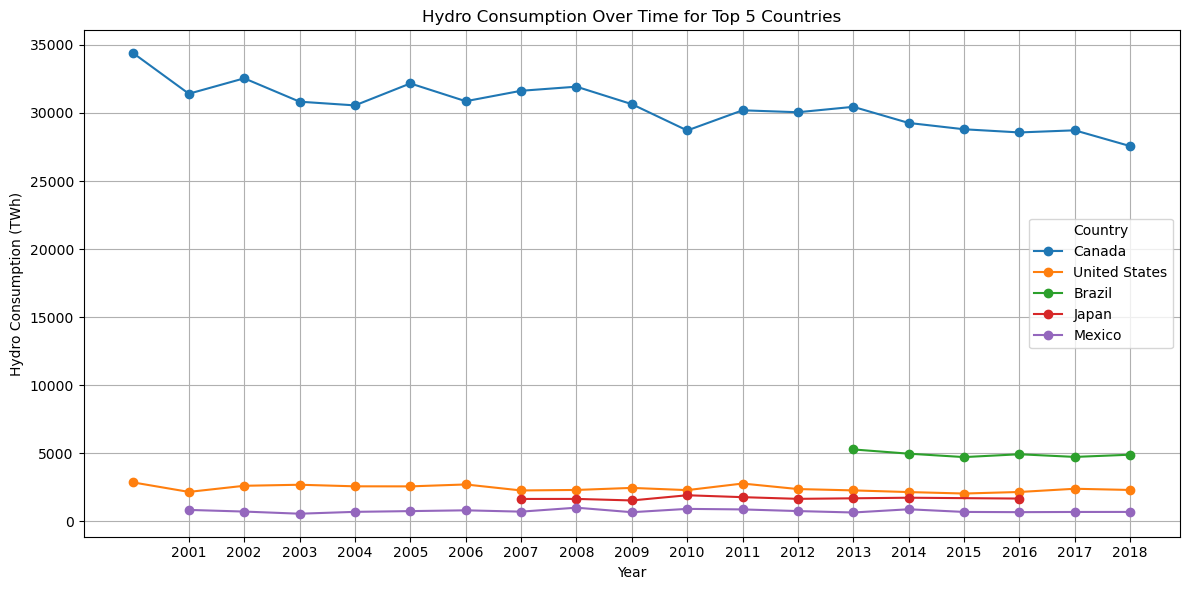

In [118]:
# Plotting the comsumption of hydro enegry

plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['hydro_energy_per_capita'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Hydro Consumption (TWh)')
plt.title('Hydro Consumption Over Time for Top 5 Countries')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()

# Save the pair plot to the 'output' folder
plt.savefig('output/hydro_consumption.png')

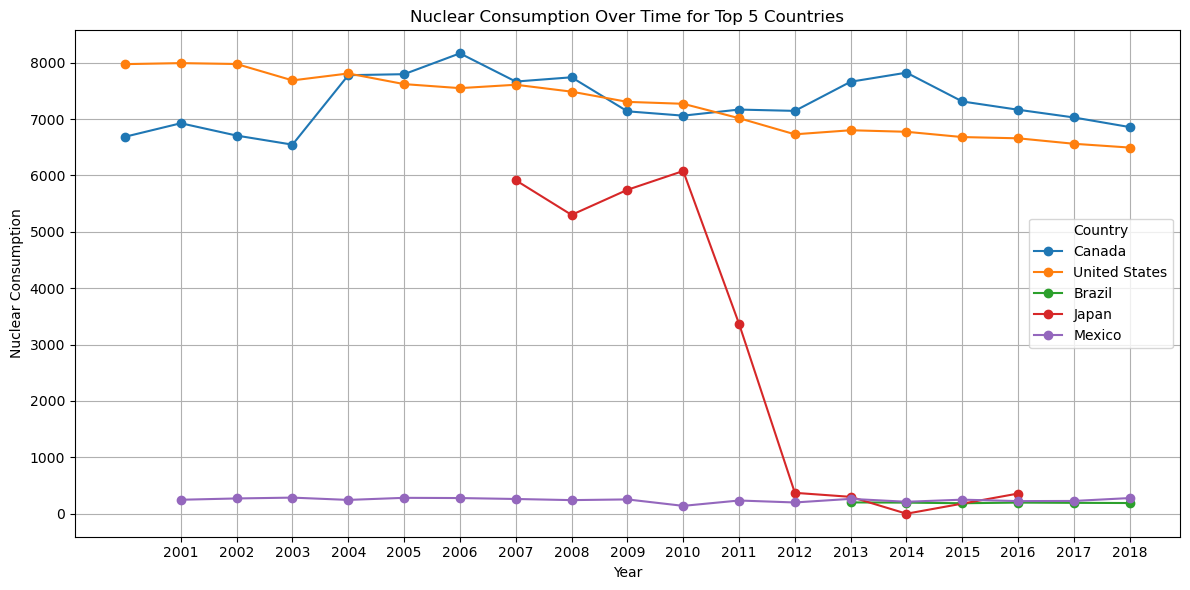

In [119]:
# Plotting the comsumption of nuclear enegry

plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['nuclear_energy_per_capita'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Nuclear Consumption')
plt.title('Nuclear Consumption Over Time for Top 5 Countries')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()


# Save the pair plot to the 'output' folder
plt.savefig('output/nuclear_consumption.png')

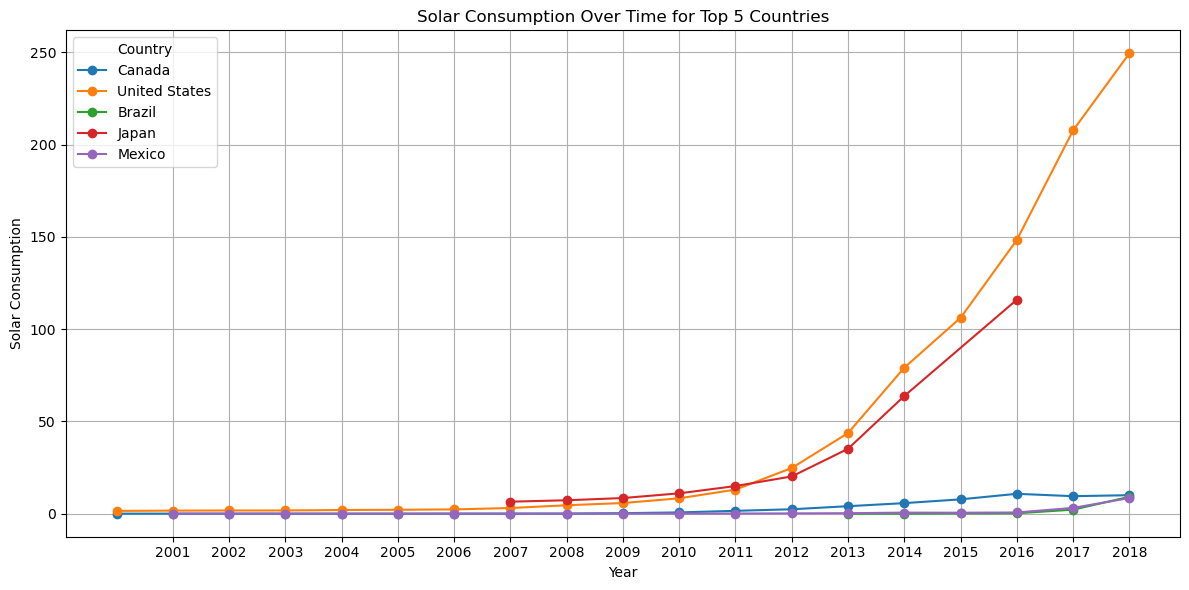

In [120]:
# Plotting the comsumption of solar enegry

plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['solar_consumption'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Solar Consumption')
plt.title('Solar Consumption Over Time for Top 5 Countries')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()


# Save the pair plot to the 'output' folder
plt.savefig('output/solar_consumption.png')

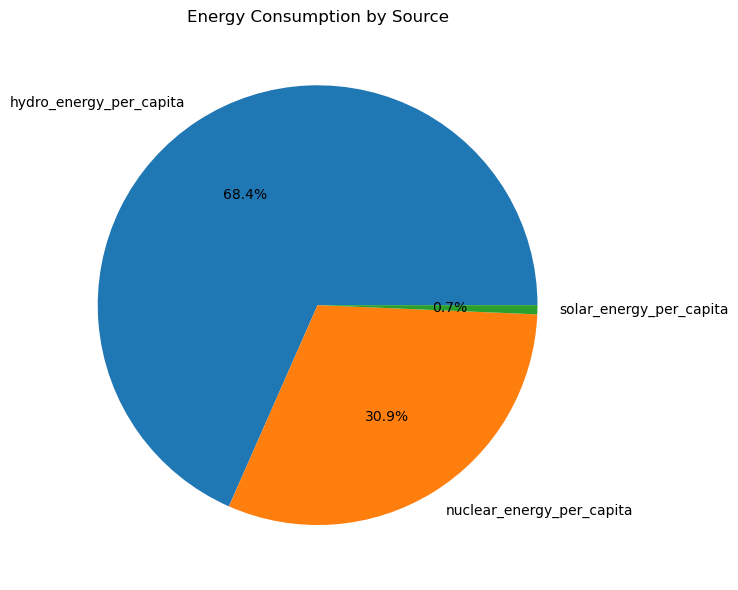

In [121]:
# Plot energy consumption breakdown by source

for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
   
fig, ax = plt.subplots(figsize=(10, 6))
source_cols = ['hydro_energy_per_capita', 'nuclear_energy_per_capita', 'solar_energy_per_capita']
top_countries_data[source_cols].sum().plot(kind='pie', ax=ax, autopct='%1.1f%%')
ax.set_title('Energy Consumption by Source')
ax.set_ylabel('')
plt.tight_layout()


# Save the pair plot to the 'output' folder
plt.savefig('output/energy_consumption_by_source.png')

In [122]:
sns.set_style("darkgrid")

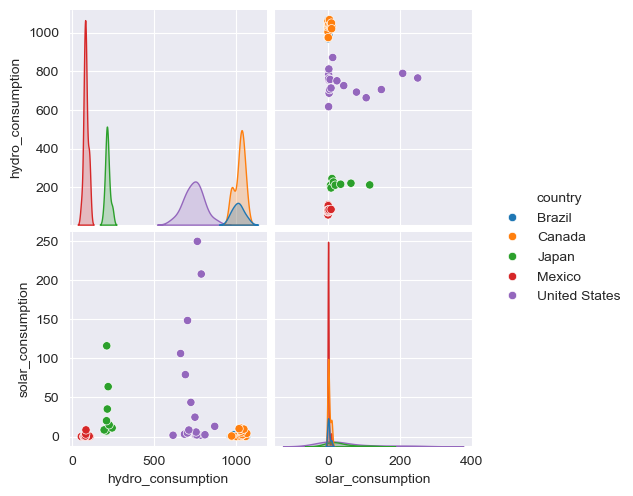

In [123]:
# Ensure the DataFrame only includes numeric columns when using mean()
numeric_columns = top_countries_data.select_dtypes(include='number')  # Select only numeric columns

# Find the top 5 countries based on mean GDP (or another metric)
top_5_countries = top_countries_data.groupby('country')[numeric_columns.columns].mean().nlargest(5, 'population').index

# Filter the data for the top 5 countries
top_5_data = top_countries_data[top_countries_data['country'].isin(top_5_countries)]

# Select the variables you want to plot
selected_variables = ['hydro_consumption', 'solar_consumption']

# Create the pair plot for the top 5 countries
sns.pairplot(top_5_data, hue='country', vars=selected_variables)

# Save the pair plot to the 'output' folder
plt.savefig('output/pairplot_top_5_countries.png') 

# Show the plot
plt.show()


In [124]:
# Filter for the last two decades (2005 to 2024)
top_5_data = top_countries_data[(top_countries_data['year'] >= 2005) & (top_countries_data['year'] <= 2024)]

# Group by country and calculate the average hydro share of electricity for each country
avg_hydro = top_5_data.groupby('country')['hydro_share_elec'].mean().reset_index()

# Sort by biofuel share of electricity and select the top N countries (e.g., top 5)
top_countries = avg_hydro.sort_values('hydro_share_elec', ascending=False).head(5)['country'].tolist()

# Filter the original DataFrame for the top N countries
df_filtered = top_5_data[top_5_data['country'].isin(top_countries)]

# Create a scatter plot for biofuel share of electricity
fig = px.scatter(df_filtered, 
                 x='year', 
                 y='hydro_share_elec', 
                 color='country', 
                 size='gdp', 
                 hover_name='country', 
                 title='Hydro Share of Electricity Over Time (Top 5 Countries)',
                 labels={'hydro_share_elec': 'Hydro Share in Electricity (%)', 'year': 'Year'})




# Show the visual
fig.show()

# Save the file
fig.write_image('output/Hydro_Share_in_Electricity_Top_5.png')

In [125]:
# Filter for the last two decades (2005 to 2024)
top_5_data = top_countries_data[(top_countries_data['year'] >= 2005) & (top_countries_data['year'] <= 2024)]

# Group by country and calculate the average nuclear share of electricity for each country
avg_hydro = top_5_data.groupby('country')['nuclear_share_elec'].mean().reset_index()

# Sort by biofuel share of electricity and select the top N countries (e.g., top 5)
top_countries = avg_hydro.sort_values('nuclear_share_elec', ascending=False).head(5)['country'].tolist()

# Filter the original DataFrame for the top N countries
df_filtered = top_5_data[top_5_data['country'].isin(top_countries)]

# Create a scatter plot for biofuel share of electricity
fig = px.scatter(df_filtered, 
                 x='year', 
                 y='nuclear_share_elec', 
                 color='country', 
                 size='gdp', 
                 hover_name='country', 
                 title='Nuclear Share of Electricity Over Time (Top 5 Countries)',
                 labels={'nuclear_share_elec': 'Nuclear Share in Electricity (%)', 'year': 'Year'})


# Save the file
fig.write_image('Output/Nuclear_Share_in_Electricity_Top_5.png')

# Show the visual
fig.show()

In [126]:
# Filter for the last two decades (2005 to 2024)
top_5_data = top_countries_data[(top_countries_data['year'] >= 2005) & (top_countries_data['year'] <= 2024)]

# Group by country and calculate the average solar share of electricity for each country
avg_hydro = top_5_data.groupby('country')['solar_share_elec'].mean().reset_index()

# Sort by biofuel share of electricity and select the top N countries (e.g., top 5)
top_countries = avg_hydro.sort_values('solar_share_elec', ascending=False).head(7)['country'].tolist()

# Filter the original DataFrame for the top N countries
df_filtered = top_5_data[top_5_data['country'].isin(top_countries)]

# Create a scatter plot for biofuel share of electricity
fig = px.scatter(df_filtered, 
                 x='year', 
                 y='solar_share_elec', 
                 color='country', 
                 size='gdp', 
                 hover_name='country', 
                 title='Solar Share of Electricity Over Time (Top 5 Countries)',
                 labels={'solar_share_elec': 'Solar Share in Electricity (%)', 'year': 'Year'})




# Show the visual
fig.show()

# Save the file
fig.write_image('Output/Solar_Share_in_Electricity_Top_5.png')